# ***Heart Disease Prediction***

<!-- ![image.png](attachment:177e4204-200e-45f9-91a8-488798f650a7.png) -->


----
# ***Table Of Content***
---

1. [About Dataset](#1-about-dataset)
2. [Importing The Libraries](#2-importing-the-libraries)
3. [Basic Explorations](#3-basic-explorations)
    1. Loading Dataset
    2. Quick Overview 
    3. Shape of dataset
    4. Null Values in Dataset
    5. Duplicates Values in Datasets  
4. [Exploring the Train Dataset](#4-exploring-the-train-dataset)
    1. Data Summary
    2. Descriptive View Of data
    3. Null Values Of data
    4. Duplicates Values Of data
5. [Lets Visualize the data](#5-lets-visualize-the-data)
    1. Univariate Analysis
    2. Exited column ( Target - Analysis)
    3. Bi-variate Analysis
6. [Preprocess Data](#6-preprocess-data)
    1. Extract & Adding Features
    2. Build a Pipelines
    3. Split Data    
7. [Model Building](#7-model-building)
    1. Model Selection
    2. Model Fine Tuning
8. [Model Evaludation and Report on Test](#8-model-evaluatio-and-repot-on-test)
9. [Build a Full Pipline To Deploy](#9-build-a-full-pipline-to-deploy)
10. [Save a Pipline](#10-save-a-pipline)

   

----
# ***1. About Dataset***
---

`Title:` ***Heart Disease Prediction Binary Classification***

`Dataset:` [link](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data)

- *`id:`* Unique identifier for each patient.
- *`age:`* Age of the patient in years.
- *`origin:`* Place of study.
- *`sex:`* Gender of the patient (Male/Female).
- *`cp:`* Chest pain type.
  - Possible values: 
    - Typical angina
    - Atypical angina
    - Non-anginal
    - Asymptomatic
- *`trestbps:`* Resting blood pressure (in mm Hg on admission to the hospital).
- *`chol:`* Serum cholesterol level in mg/dl.
- *`fbs:`* Fasting blood sugar level (if fasting blood sugar > 120 mg/dl).
- *`restecg:`* Resting electrocardiographic results.
  - Possible values: 
    - Normal
    - ST-T abnormality
    - Left ventricular hypertrophy
- *`thalach:`* Maximum heart rate achieved.
- *`exang:`* Exercise-induced angina.
  - Values: True/False
- *`oldpeak:`* ST depression induced by exercise relative to rest.
- *`slope:`* The slope of the peak exercise ST segment.
- *`ca:`* Number of major vessels (0-3) colored by fluoroscopy.
- *`thal:`* Thallium stress test result.
  - Possible values: 
    - Normal
    - Fixed defect
    - Reversible defect
- *`num:`* The predicted attribute.

----
# ***2. Importing The Libraries***
---

In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
from termcolor import colored

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#preprocessing
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer ,KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import cross_val_score

from sklearn.impute import IterativeImputer
#models
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

# Acu and Error 
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    roc_curve,
    auc,
    f1_score,
    mean_absolute_error , mean_squared_error , r2_score  , accuracy_score
)

# Save Pipline 
import joblib

----
# ***3. Basic Explorations***
---

> ####  _**3.1 Loading the Dataset**_

In [3]:
data = pd.read_csv('heart_disease_uci.csv')

> #### ***3.2 Quick Overview***

In [4]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


> #### ***3.3 Shape of Datasets***

In [5]:
# Checking the number of rows and columns

num_train_rows, num_train_columns = data.shape

print("Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")

Data:
Number of Rows: 920
Number of Columns: 16



> #### ***3.4 Null Values in Datasets***

In [6]:
# Null Values in Train 
data_null = data.isnull().sum().sum()

print(f'Null Count in Data: {data_null}')


Null Count in Data: 1759


> #### ***3.5 Duplicates Values in Datasets***

In [7]:
# Count duplicate rows in train_data
data_duplicates = data.duplicated().sum()



# Print the results
print(f"Number of duplicate rows in train_data: {data_duplicates}")


Number of duplicate rows in train_data: 0


----
# ***4. Exploring the Train Dataset***
---

> #### ***4.1 Data Summary***

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


- *There are `920` rows and `16` columns in the dataset.*
- *The columns having `float` datatypes are `5`, `integer` datatype `3`, `object` datatype are `8`*
- *The data contain  missing values*
- *The target variable in the dataset is `num`.*

> #### ***4.2 Descriptive View Of data***

In [9]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [10]:
data.describe(include = ['O'])

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


> #### ***4.3 Null Values Of data***

In [11]:
print(colored('Null values in data :', 'red'))
print(data.isnull().sum())

Null values in data :
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


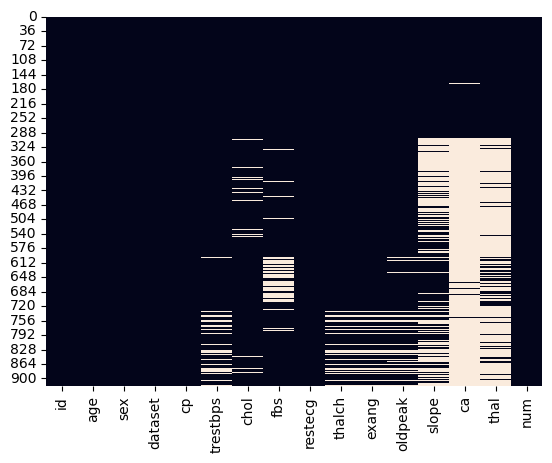

In [12]:
# visual proof 
sns.heatmap(data.isnull(), cbar=False)
plt.show()

> #### ***4.4 Duplicates Values Of data***

In [13]:
# Count duplicate rows in train_data
train_duplicates = data.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in train_data: {train_duplicates}")


Number of duplicate rows in train_data: 0


In [14]:
data.drop(columns=['id', 'dataset']  , inplace=True)

In [15]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

*Select Category and Numerical Columns for Analysis*

----
# ***5. Lets Visualize the data***
---

In [16]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
palette = [ '#0077B6' , '#0096C7' , '#00b4d8' , '#90e0ef' , '#caf0f8']
color_palette = sns.color_palette(palette)

sns.set_style('whitegrid')

In [19]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


> ### ***5.1 Univariate Analysis***

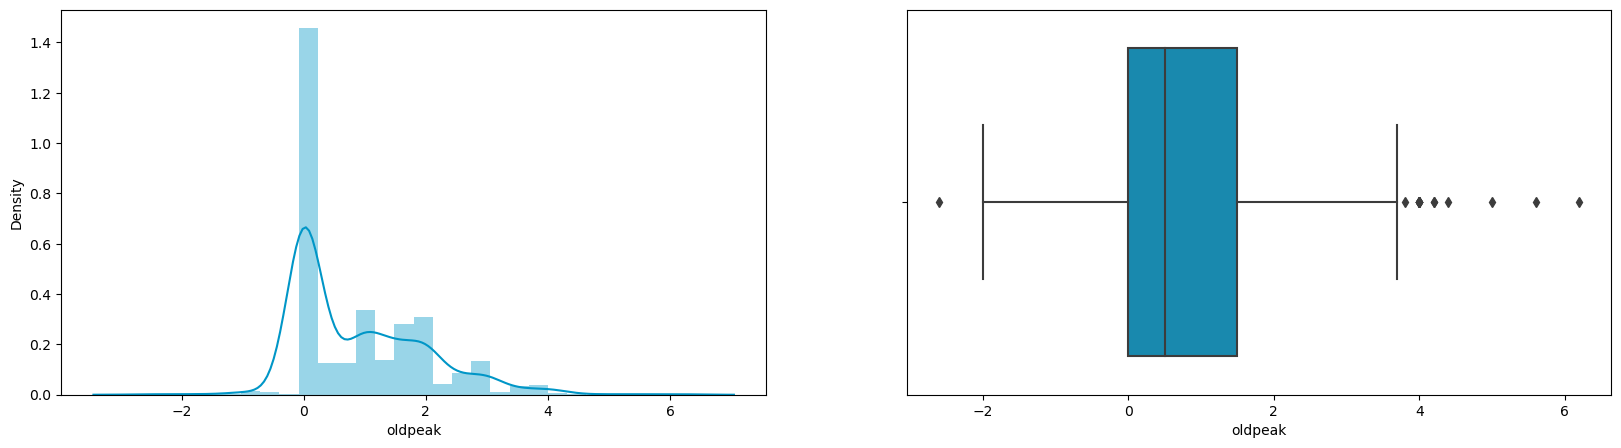

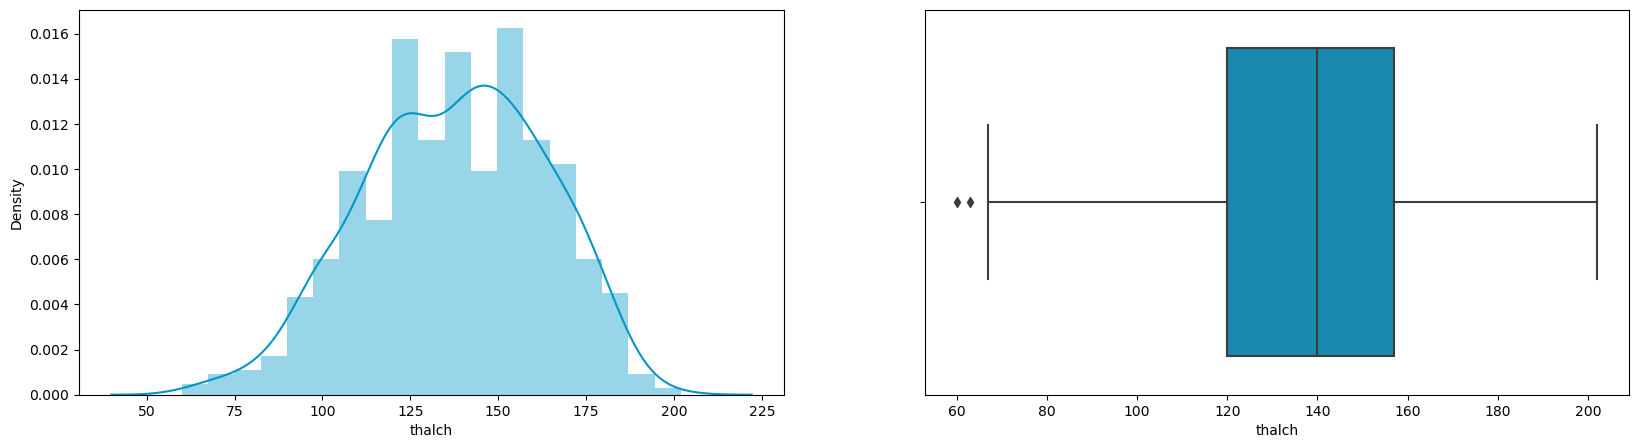

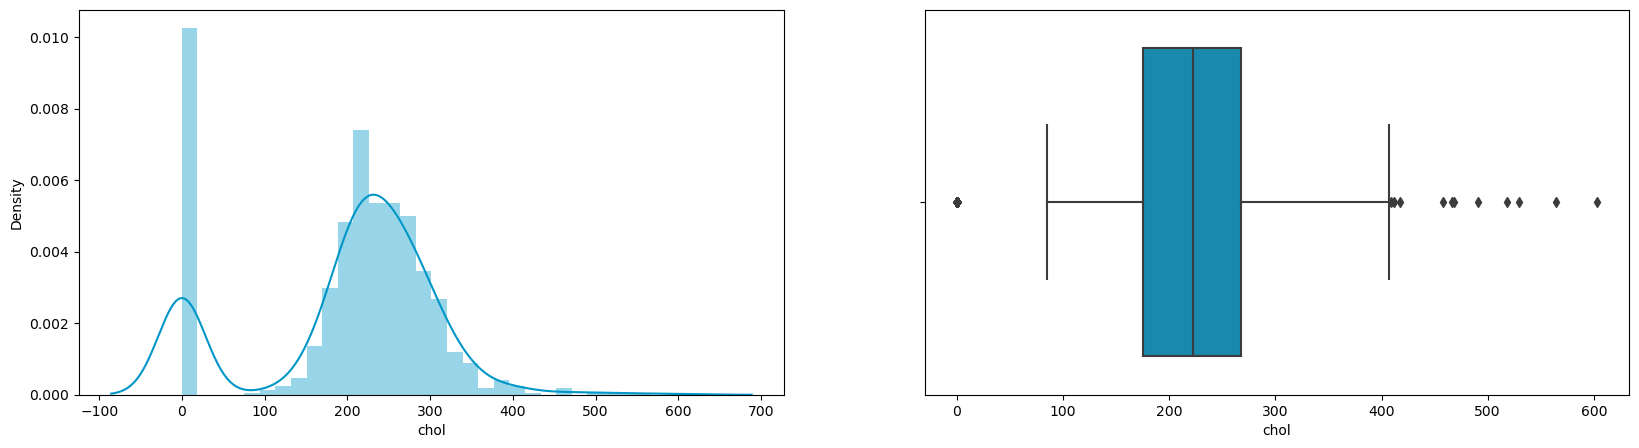

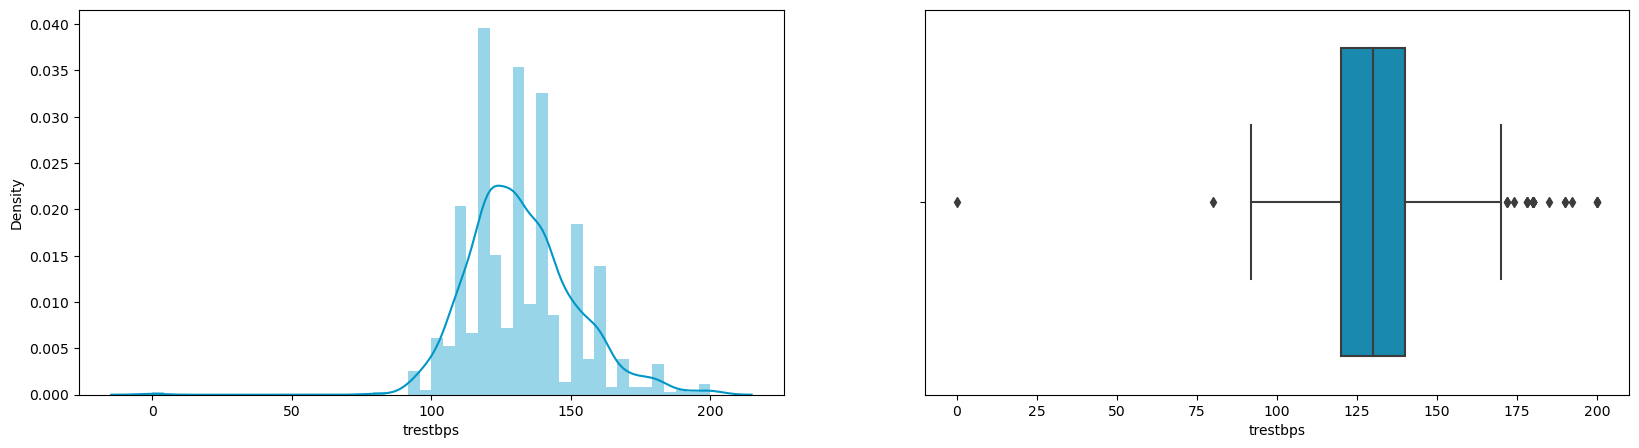

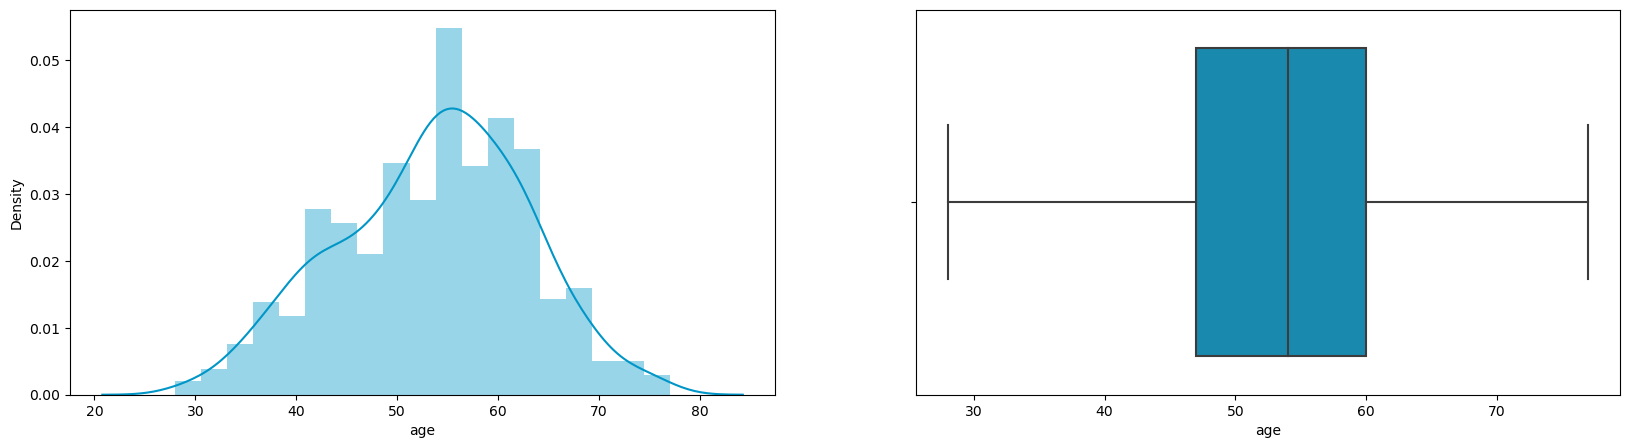

In [20]:
for col in numeric_cols:
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    sns.distplot(data[col], ax=ax[0] , color=palette[1])  
    sns.boxplot(x=data[col], ax=ax[1] ,  palette=palette[1:])

- Outliers Have some Meaningfull Insight , so we Cannot remove them . Leave them in the Dataset .

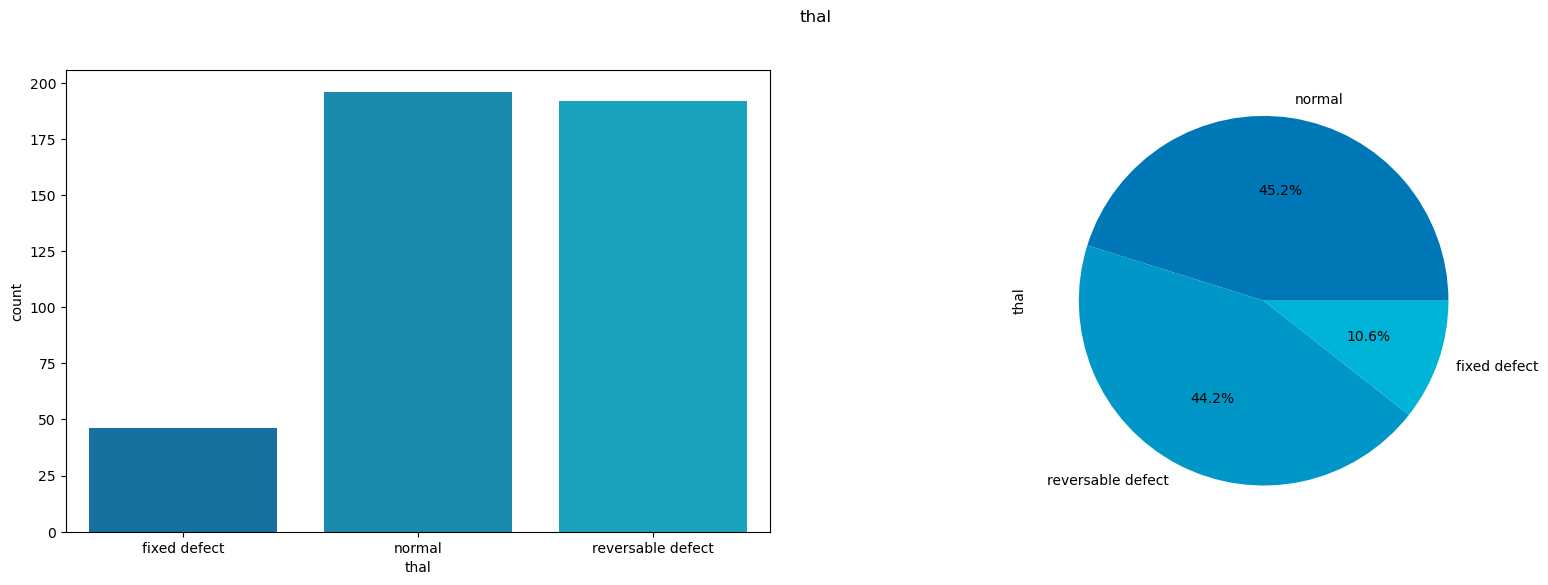

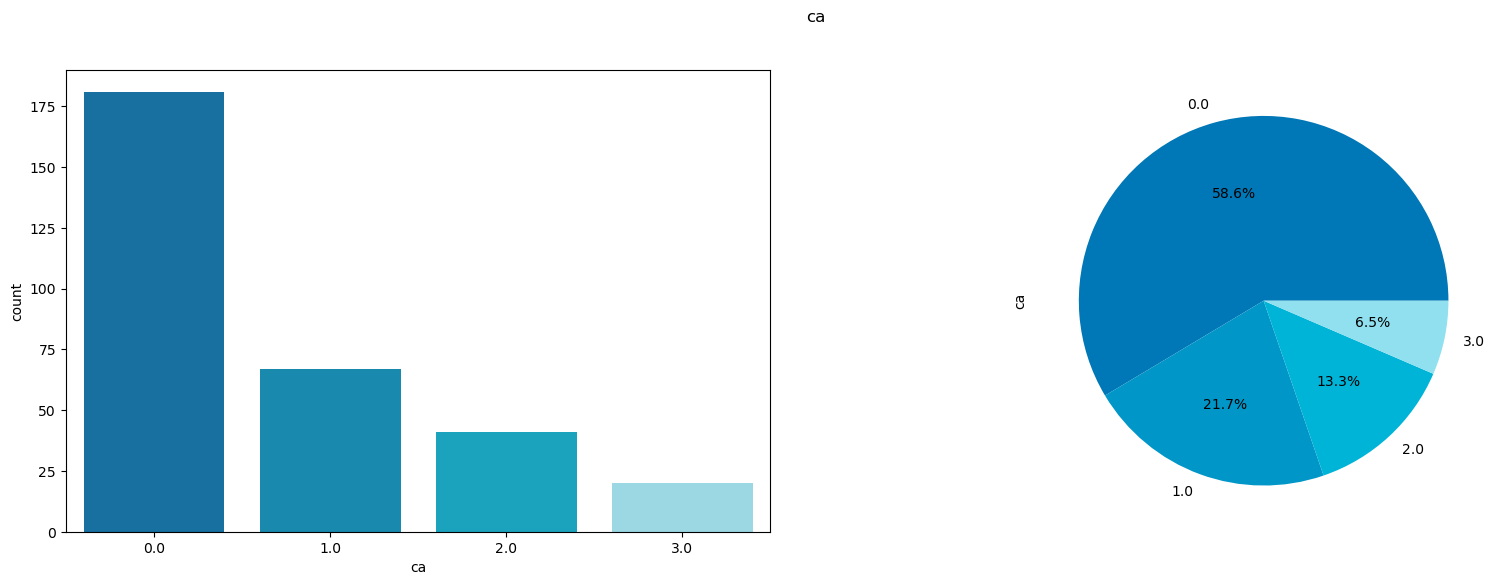

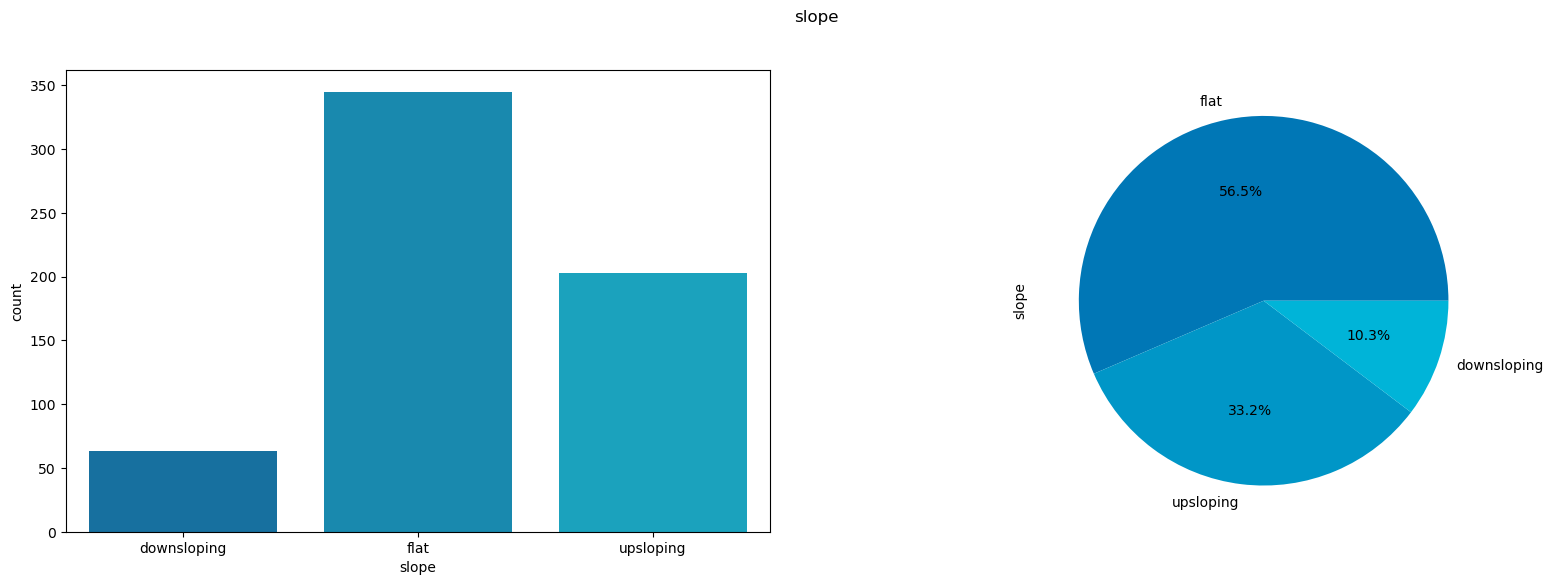

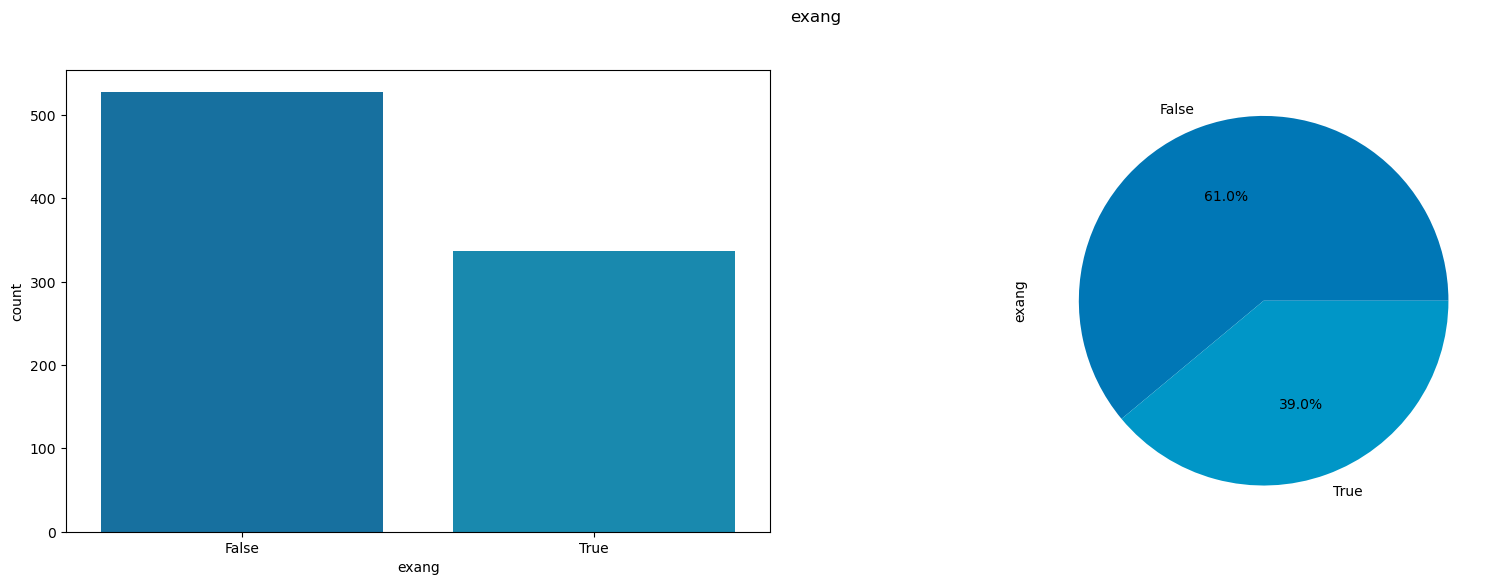

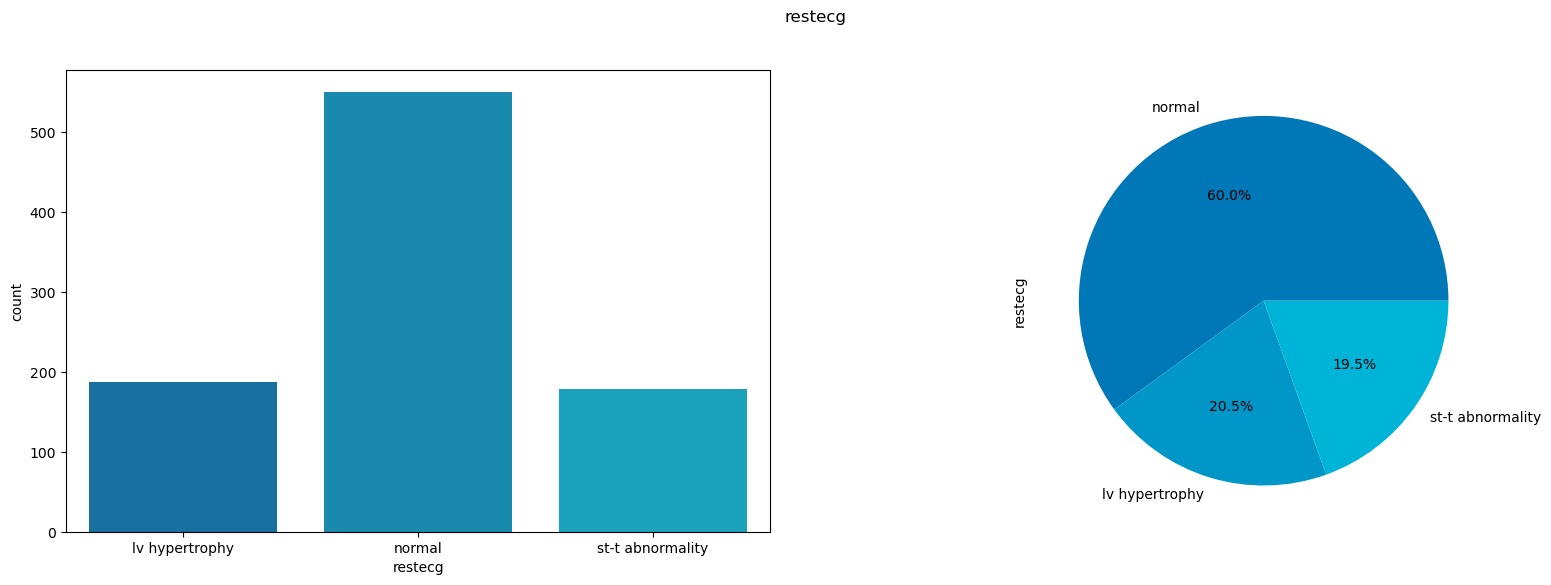

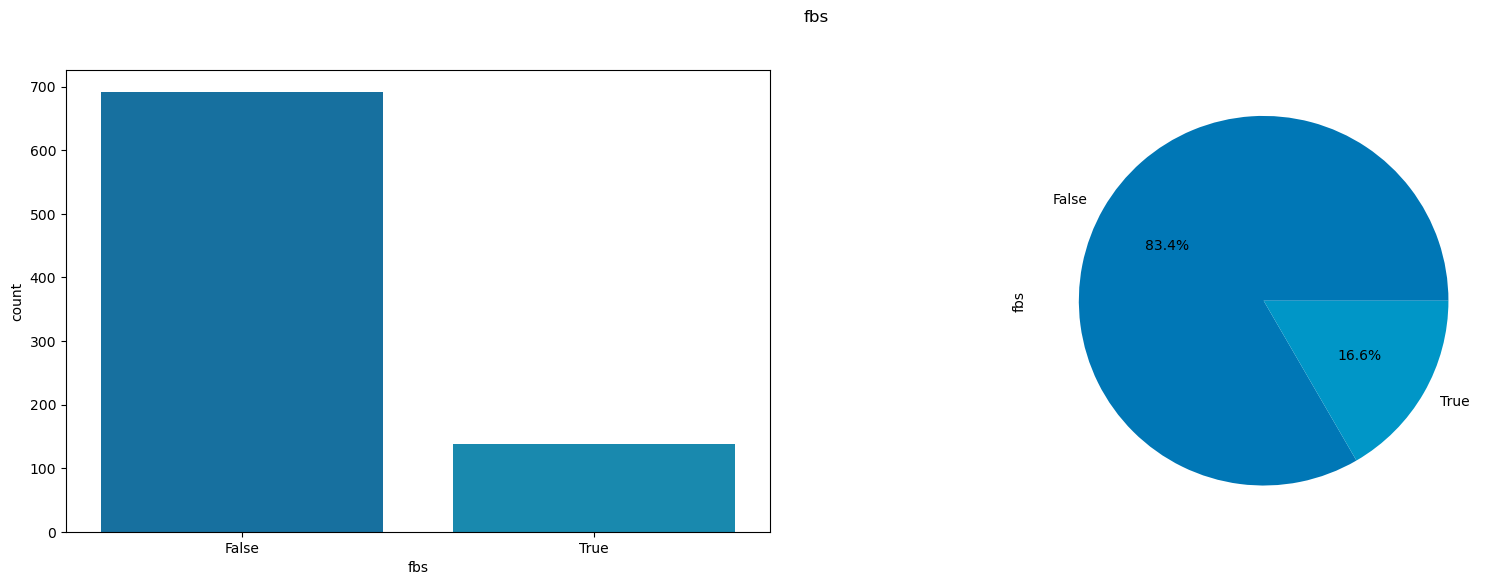

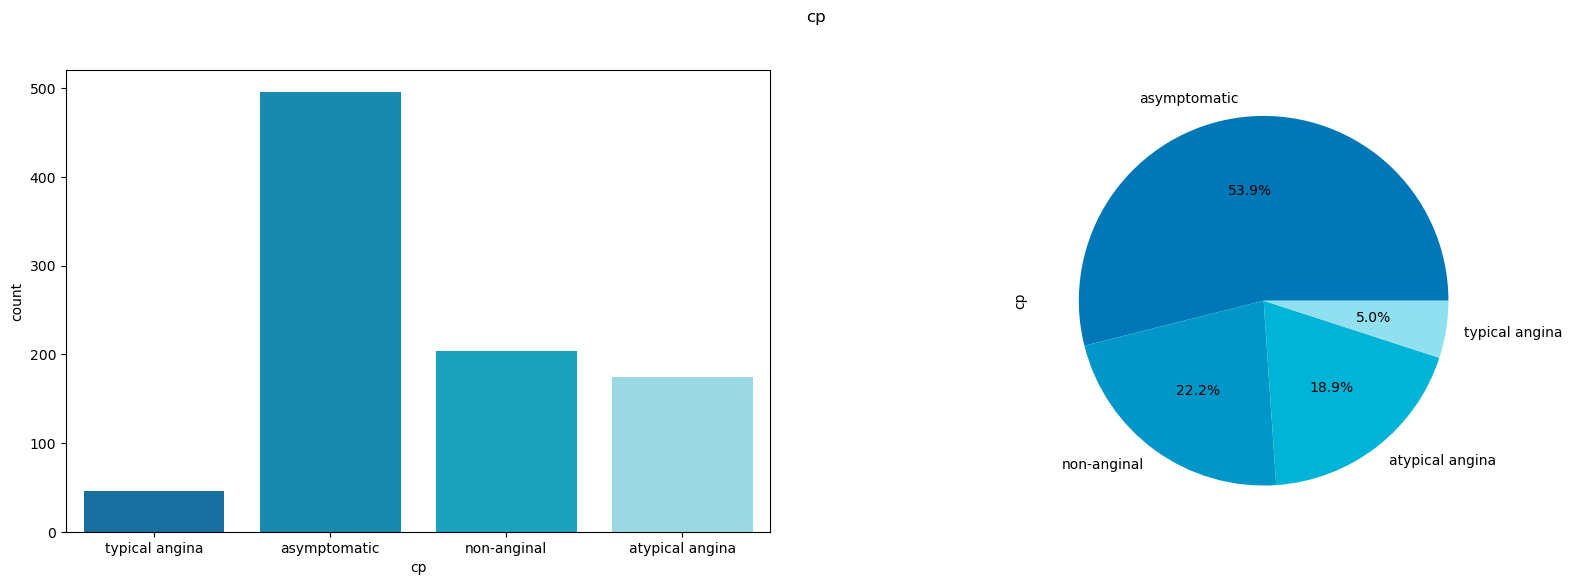

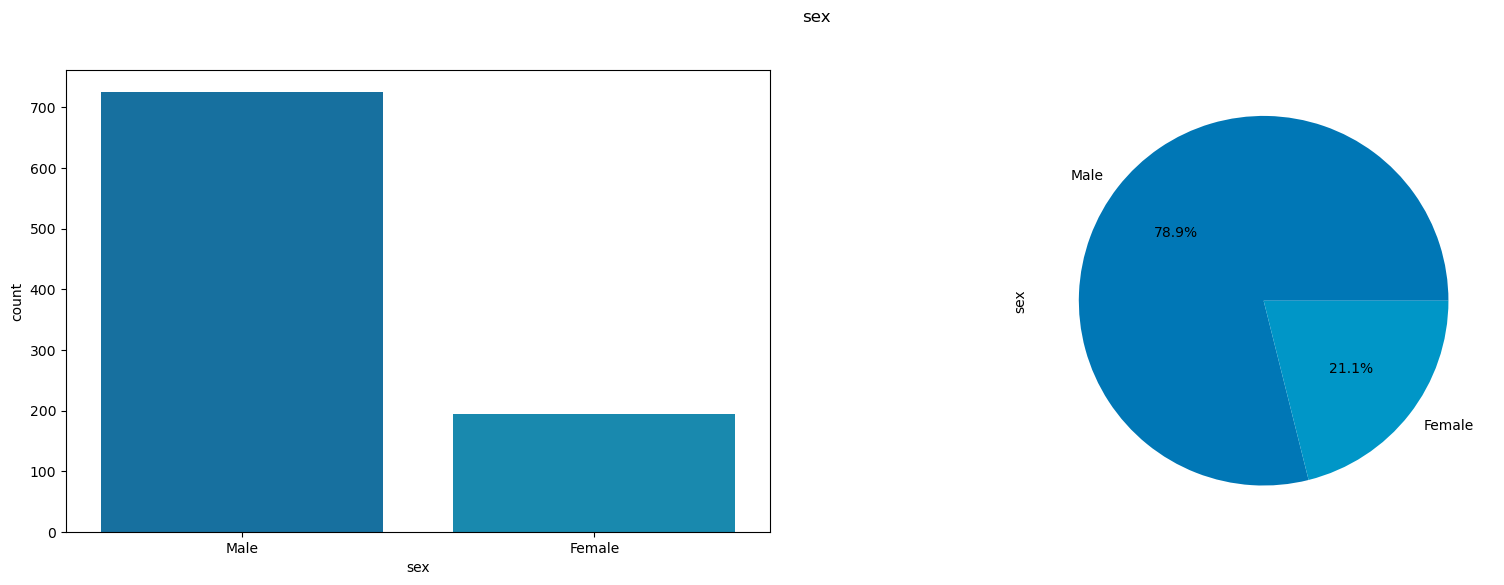

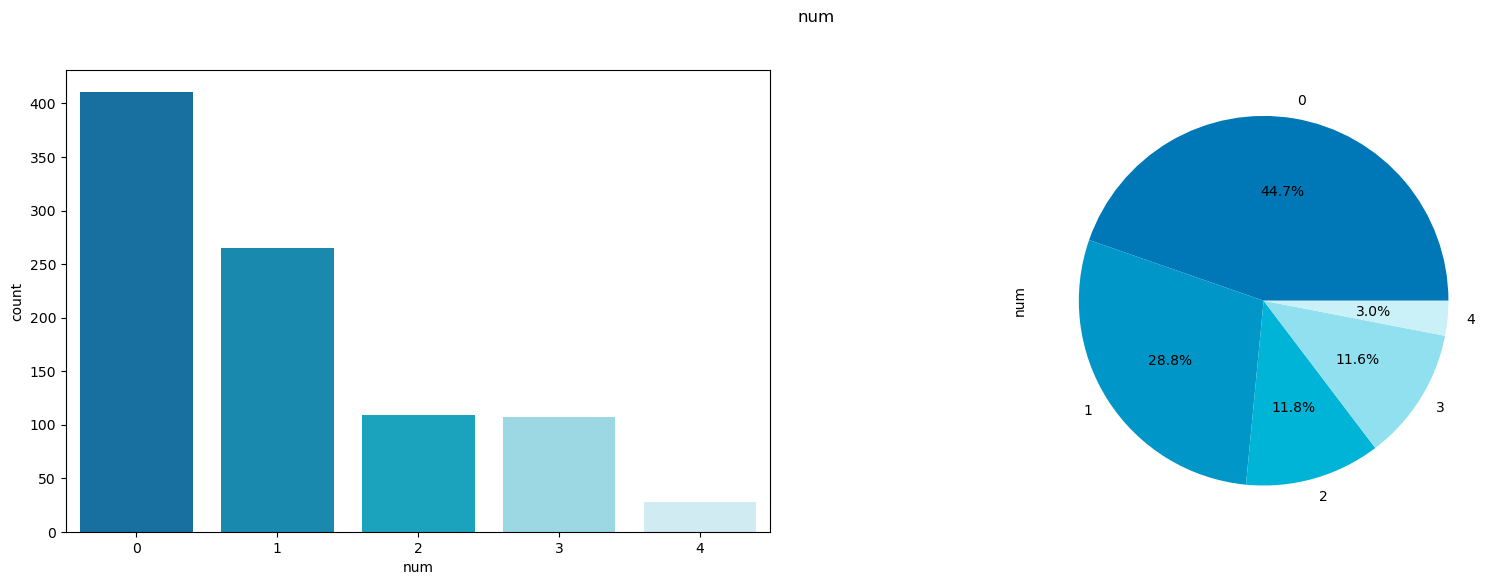

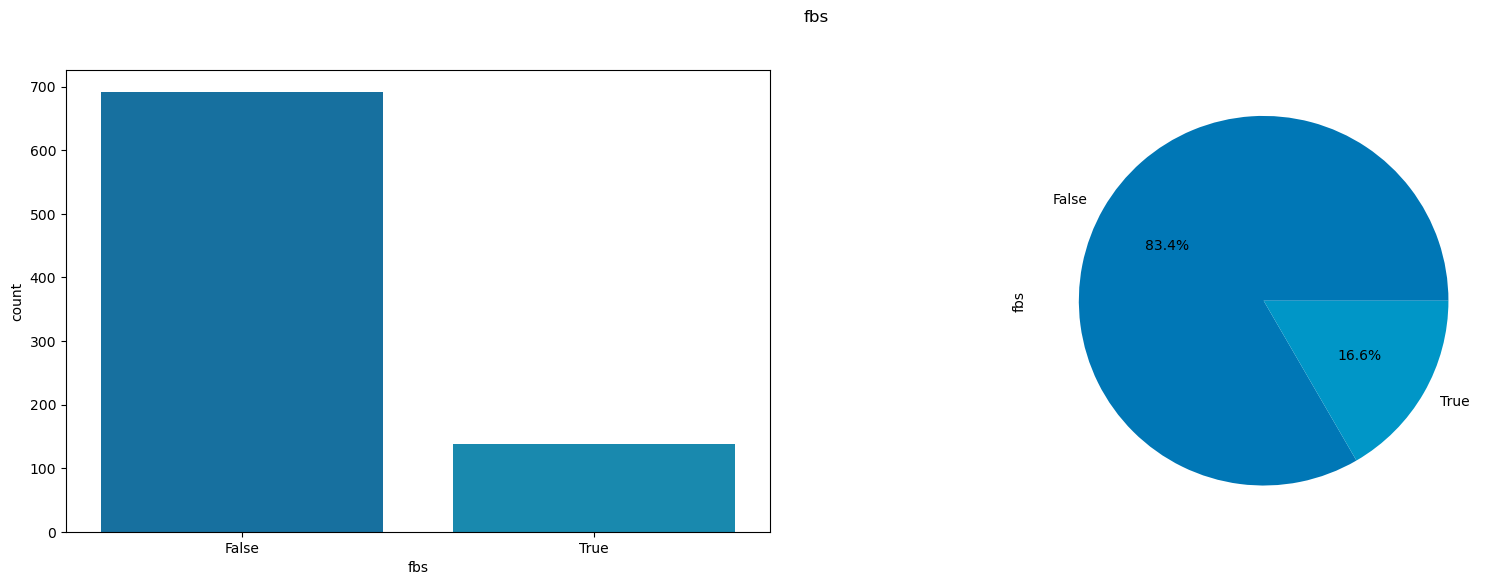

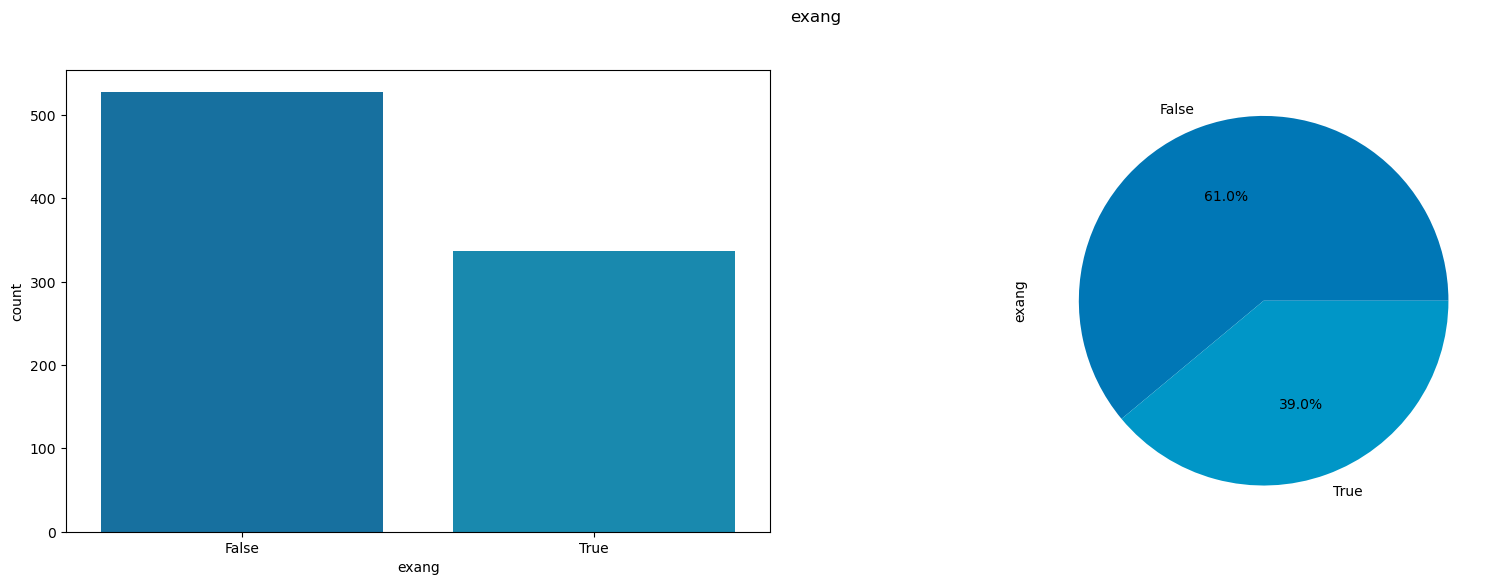

In [21]:
for column in (categorical_cols+ bool_cols):
    f,ax=plt.subplots(1,2,figsize=(20,6))
    
    data[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1] ,  colors= palette)
    sns.countplot(x=column,data=data,ax=ax[0] ,  palette= palette)
    
    plt.suptitle(f'{column}')
    plt.show()

- **We See :**
- The Gender :  `Male: 79% and Female: 21%`
- chest pain type : 
`asymptomatic : 57%`
`non-anginal : 22%`
`atypical angina: 19%`
`typical angina: 5%`  
- fasting blood sugar: `False : 83.4%` `True 16.6%`  
- ecg observation at resting condition : `Normal  60%` `lv hypertrophy 20%` `st-t abnormality 20%`

- exercise induced angina `True 39%` `False 61%`
- the slope of the peak exercise ST segment `flat 56.5%` `upsloping 33.2%` `Downsloping 10.3%`
- thal `Normal: 45.2%` `Fixed defect: 10.6%` `Reversible defect: 44.2%`
- num `0: 44.7%` `1: 28.8%` `2: 11.8%` `3: 11.6%` `4: 3.0%`



> ### ***5.3 Bi-variate Analysis***

<Axes: >

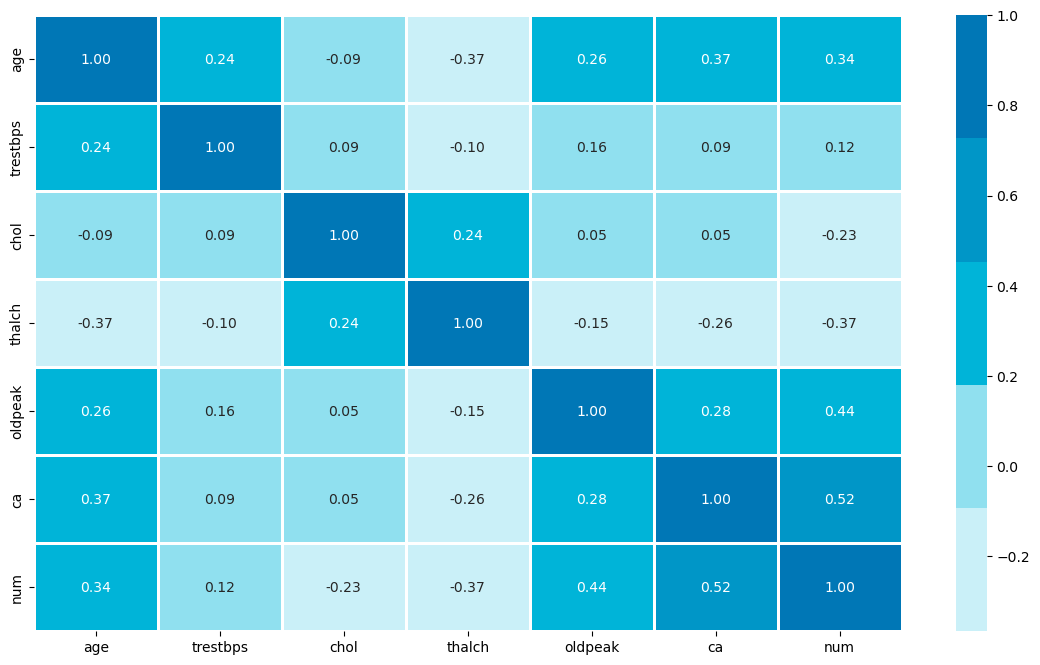

In [22]:
plt.figure(figsize= (14, 8))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', linewidths= 0.8  , cmap= palette[::-1])

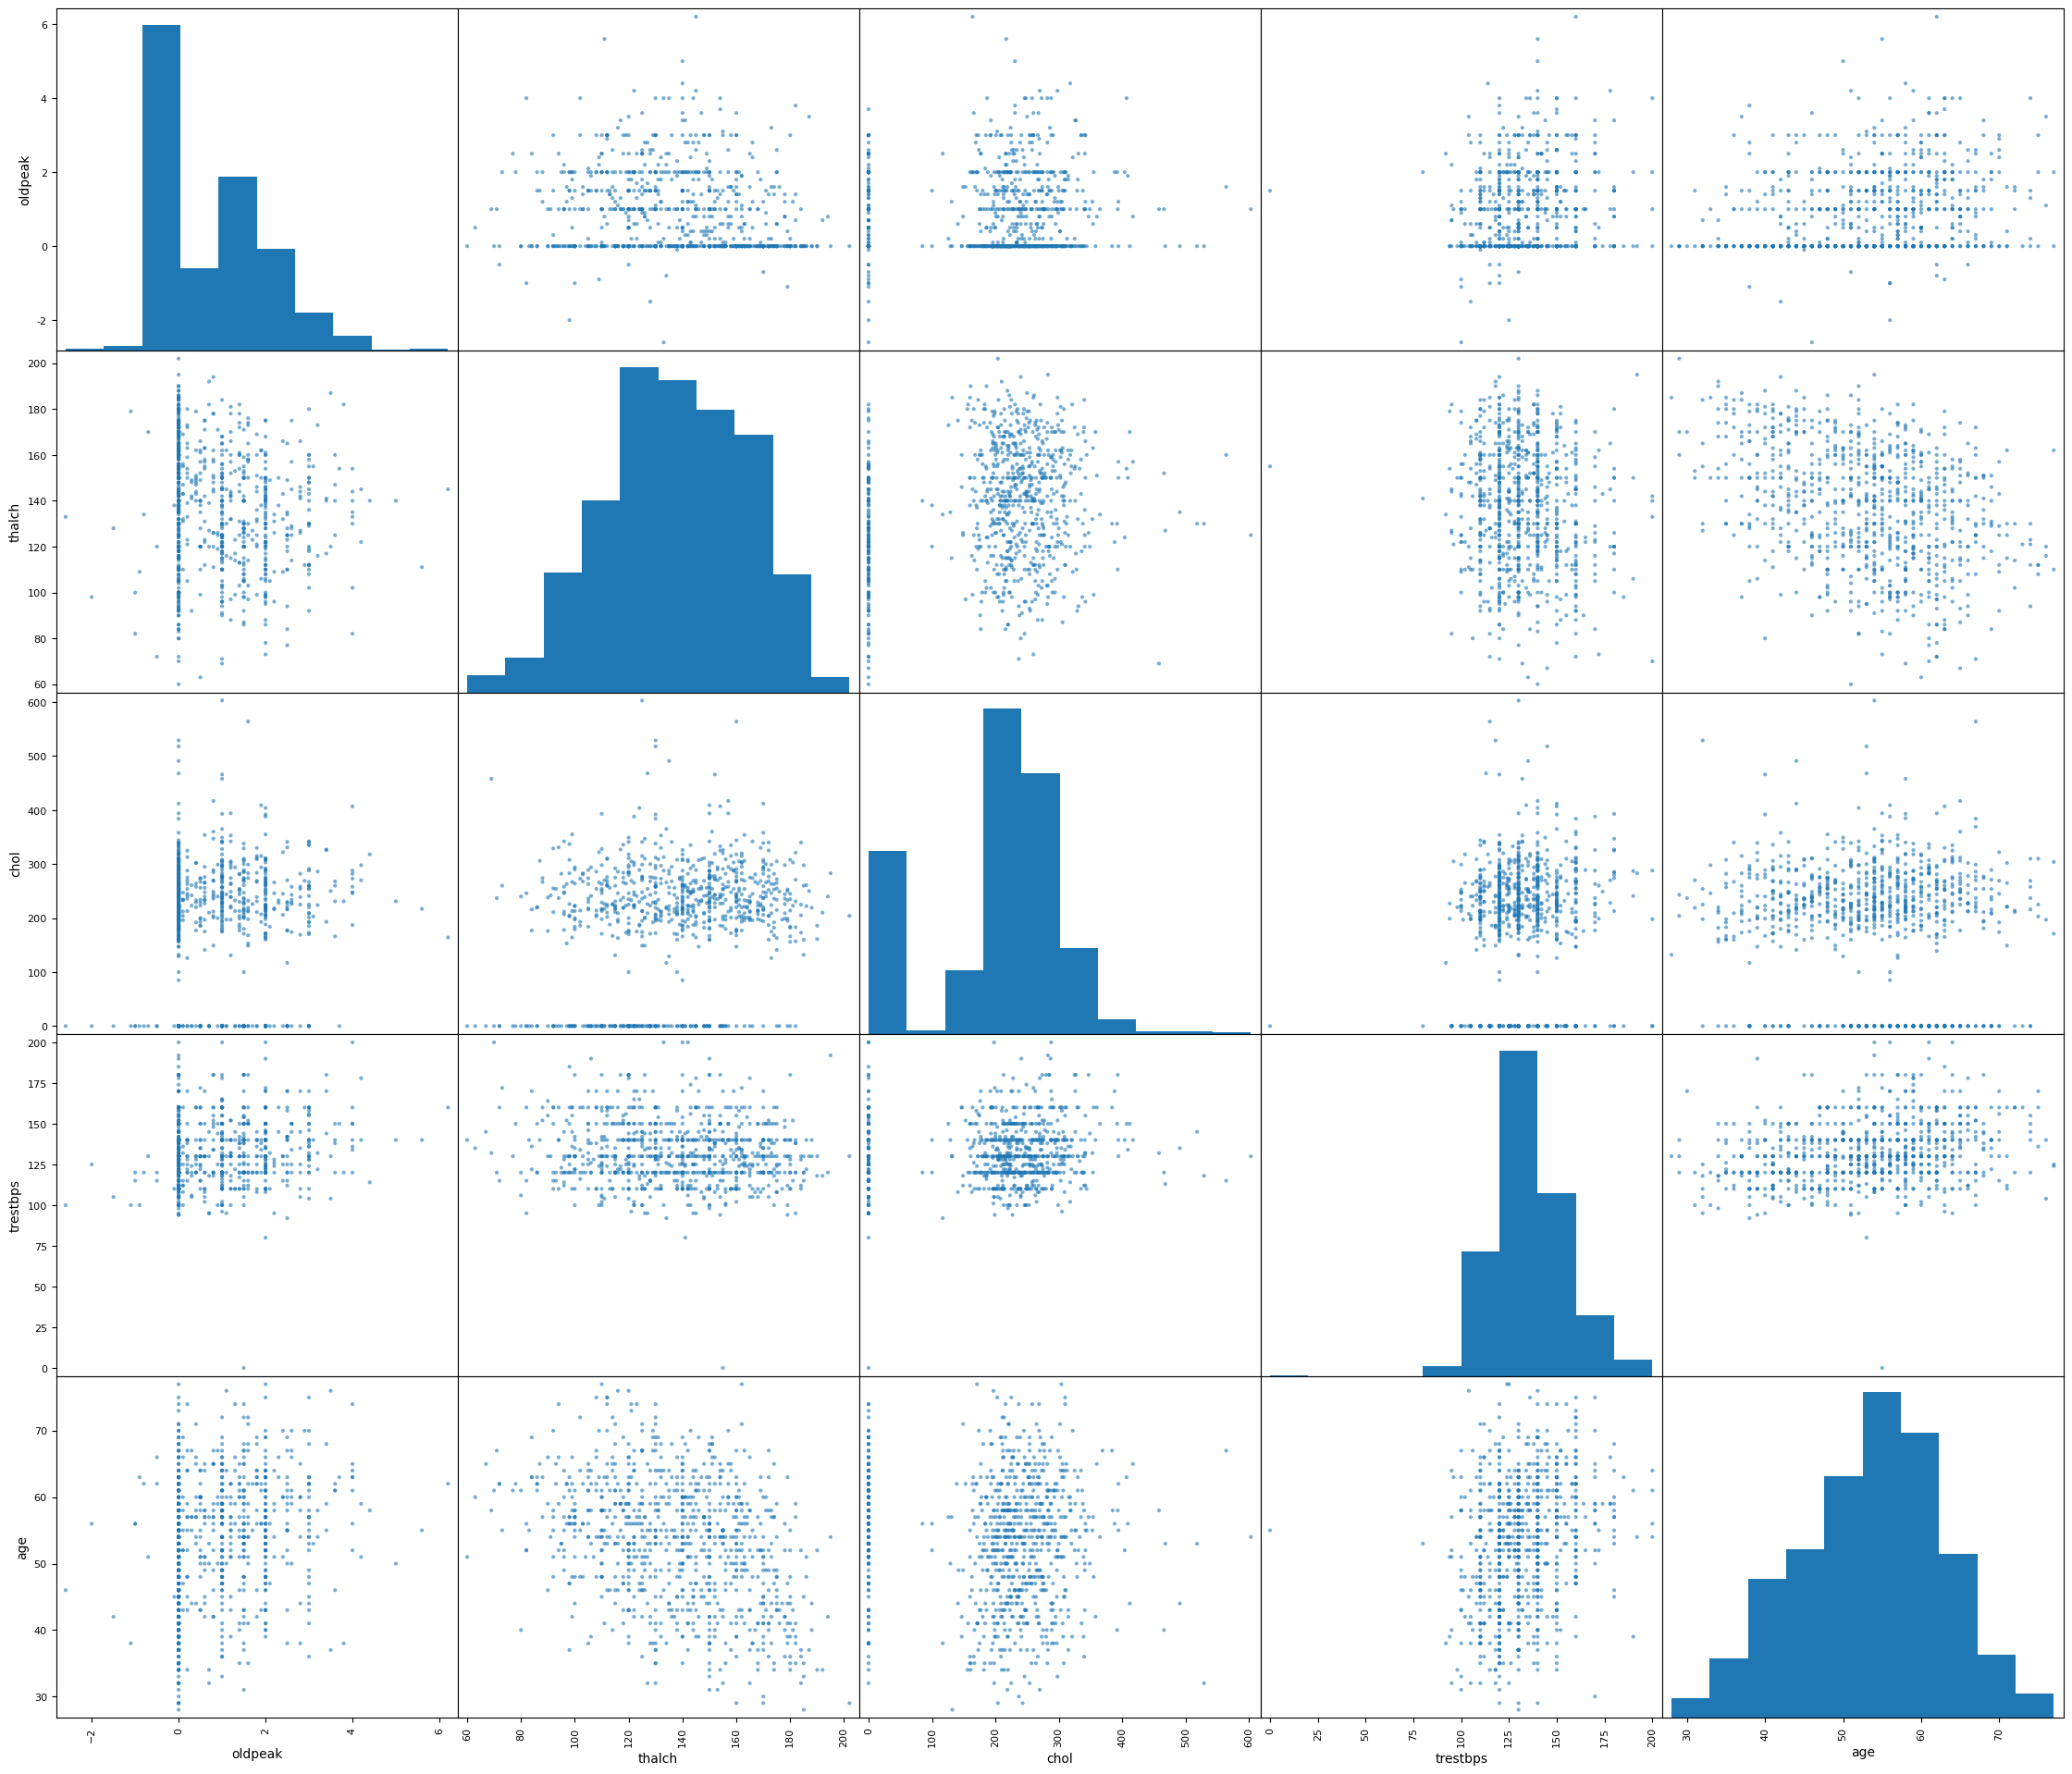

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[numeric_cols], figsize=(28, 24)  ,alpha = 0.6)
plt.show()

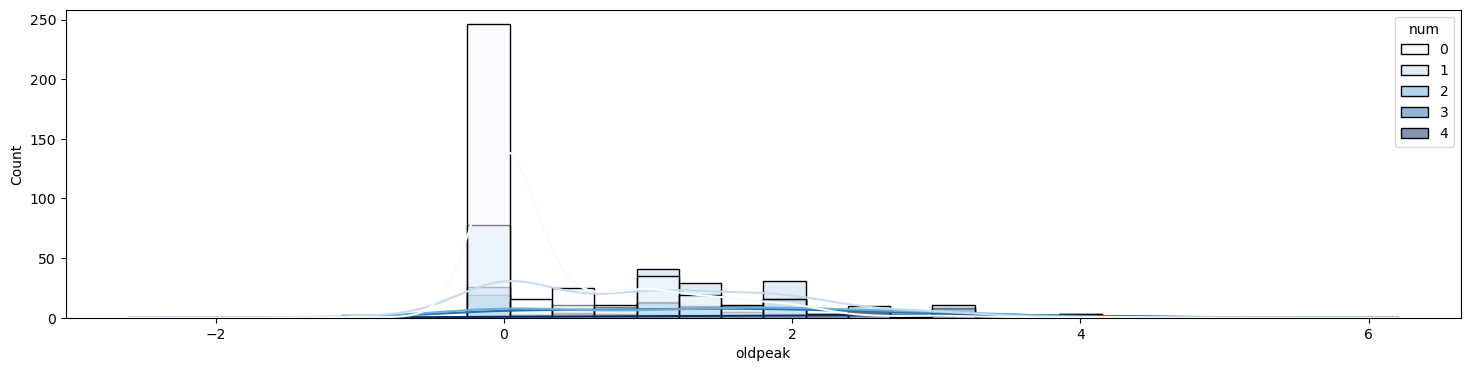

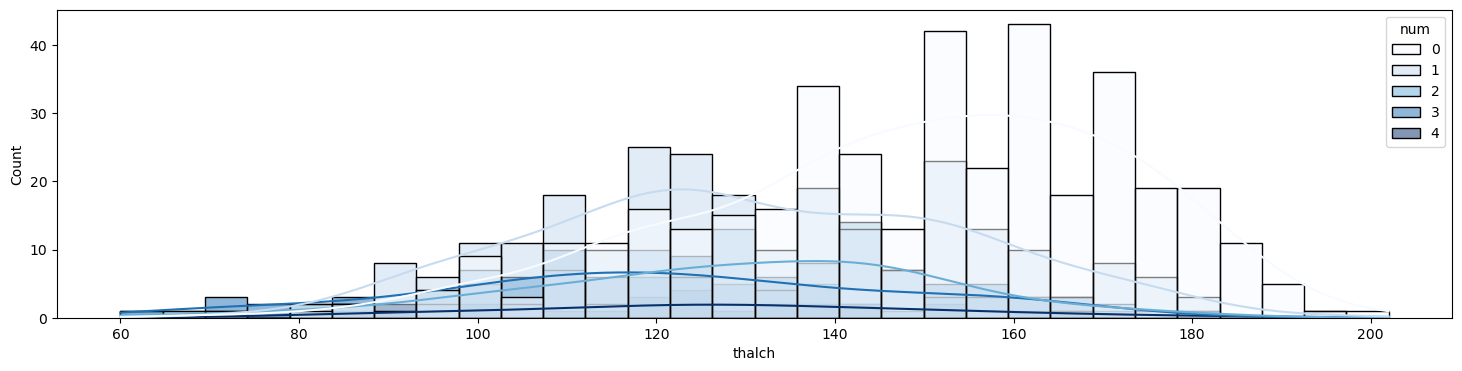

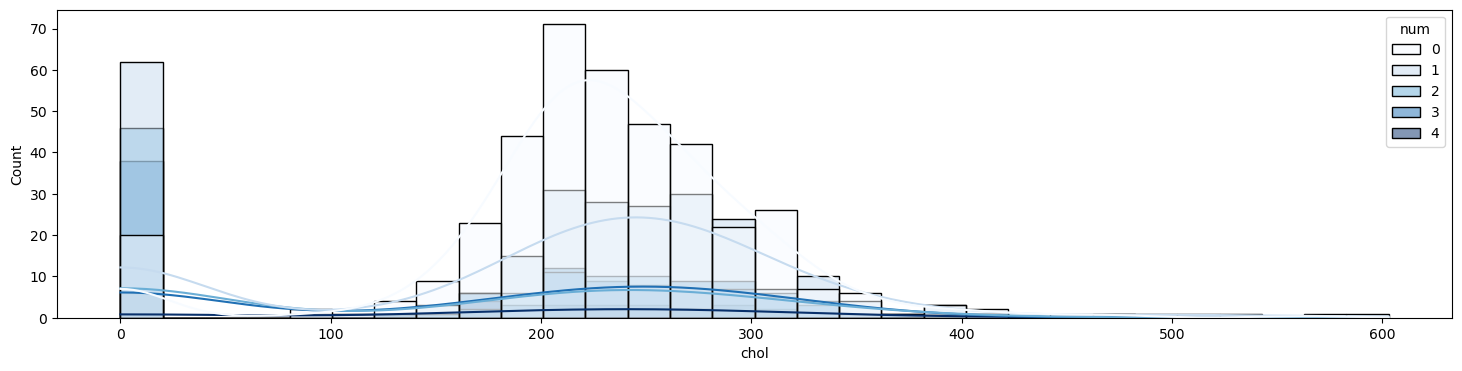

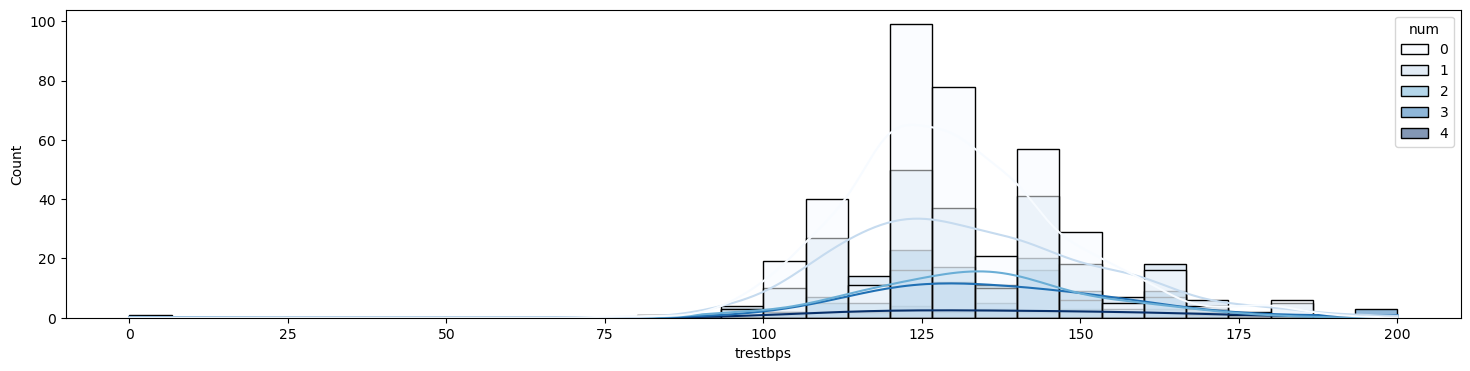

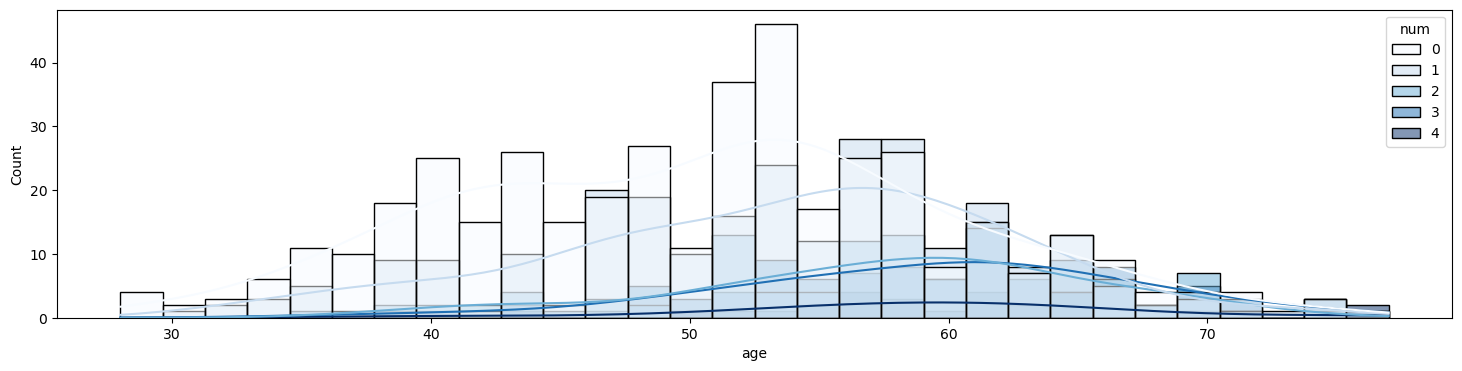

In [24]:
for column in numeric_cols:
    fig, ax = plt.subplots(figsize=(18, 4))
    fig = sns.histplot(data=data, x=column, hue="num", bins=30, kde=True  ,palette='Blues')
    plt.show()

- The minimum age to have a heart disease starts from 28 years old.
- Most of the people get heart disease at the age of 50 years.


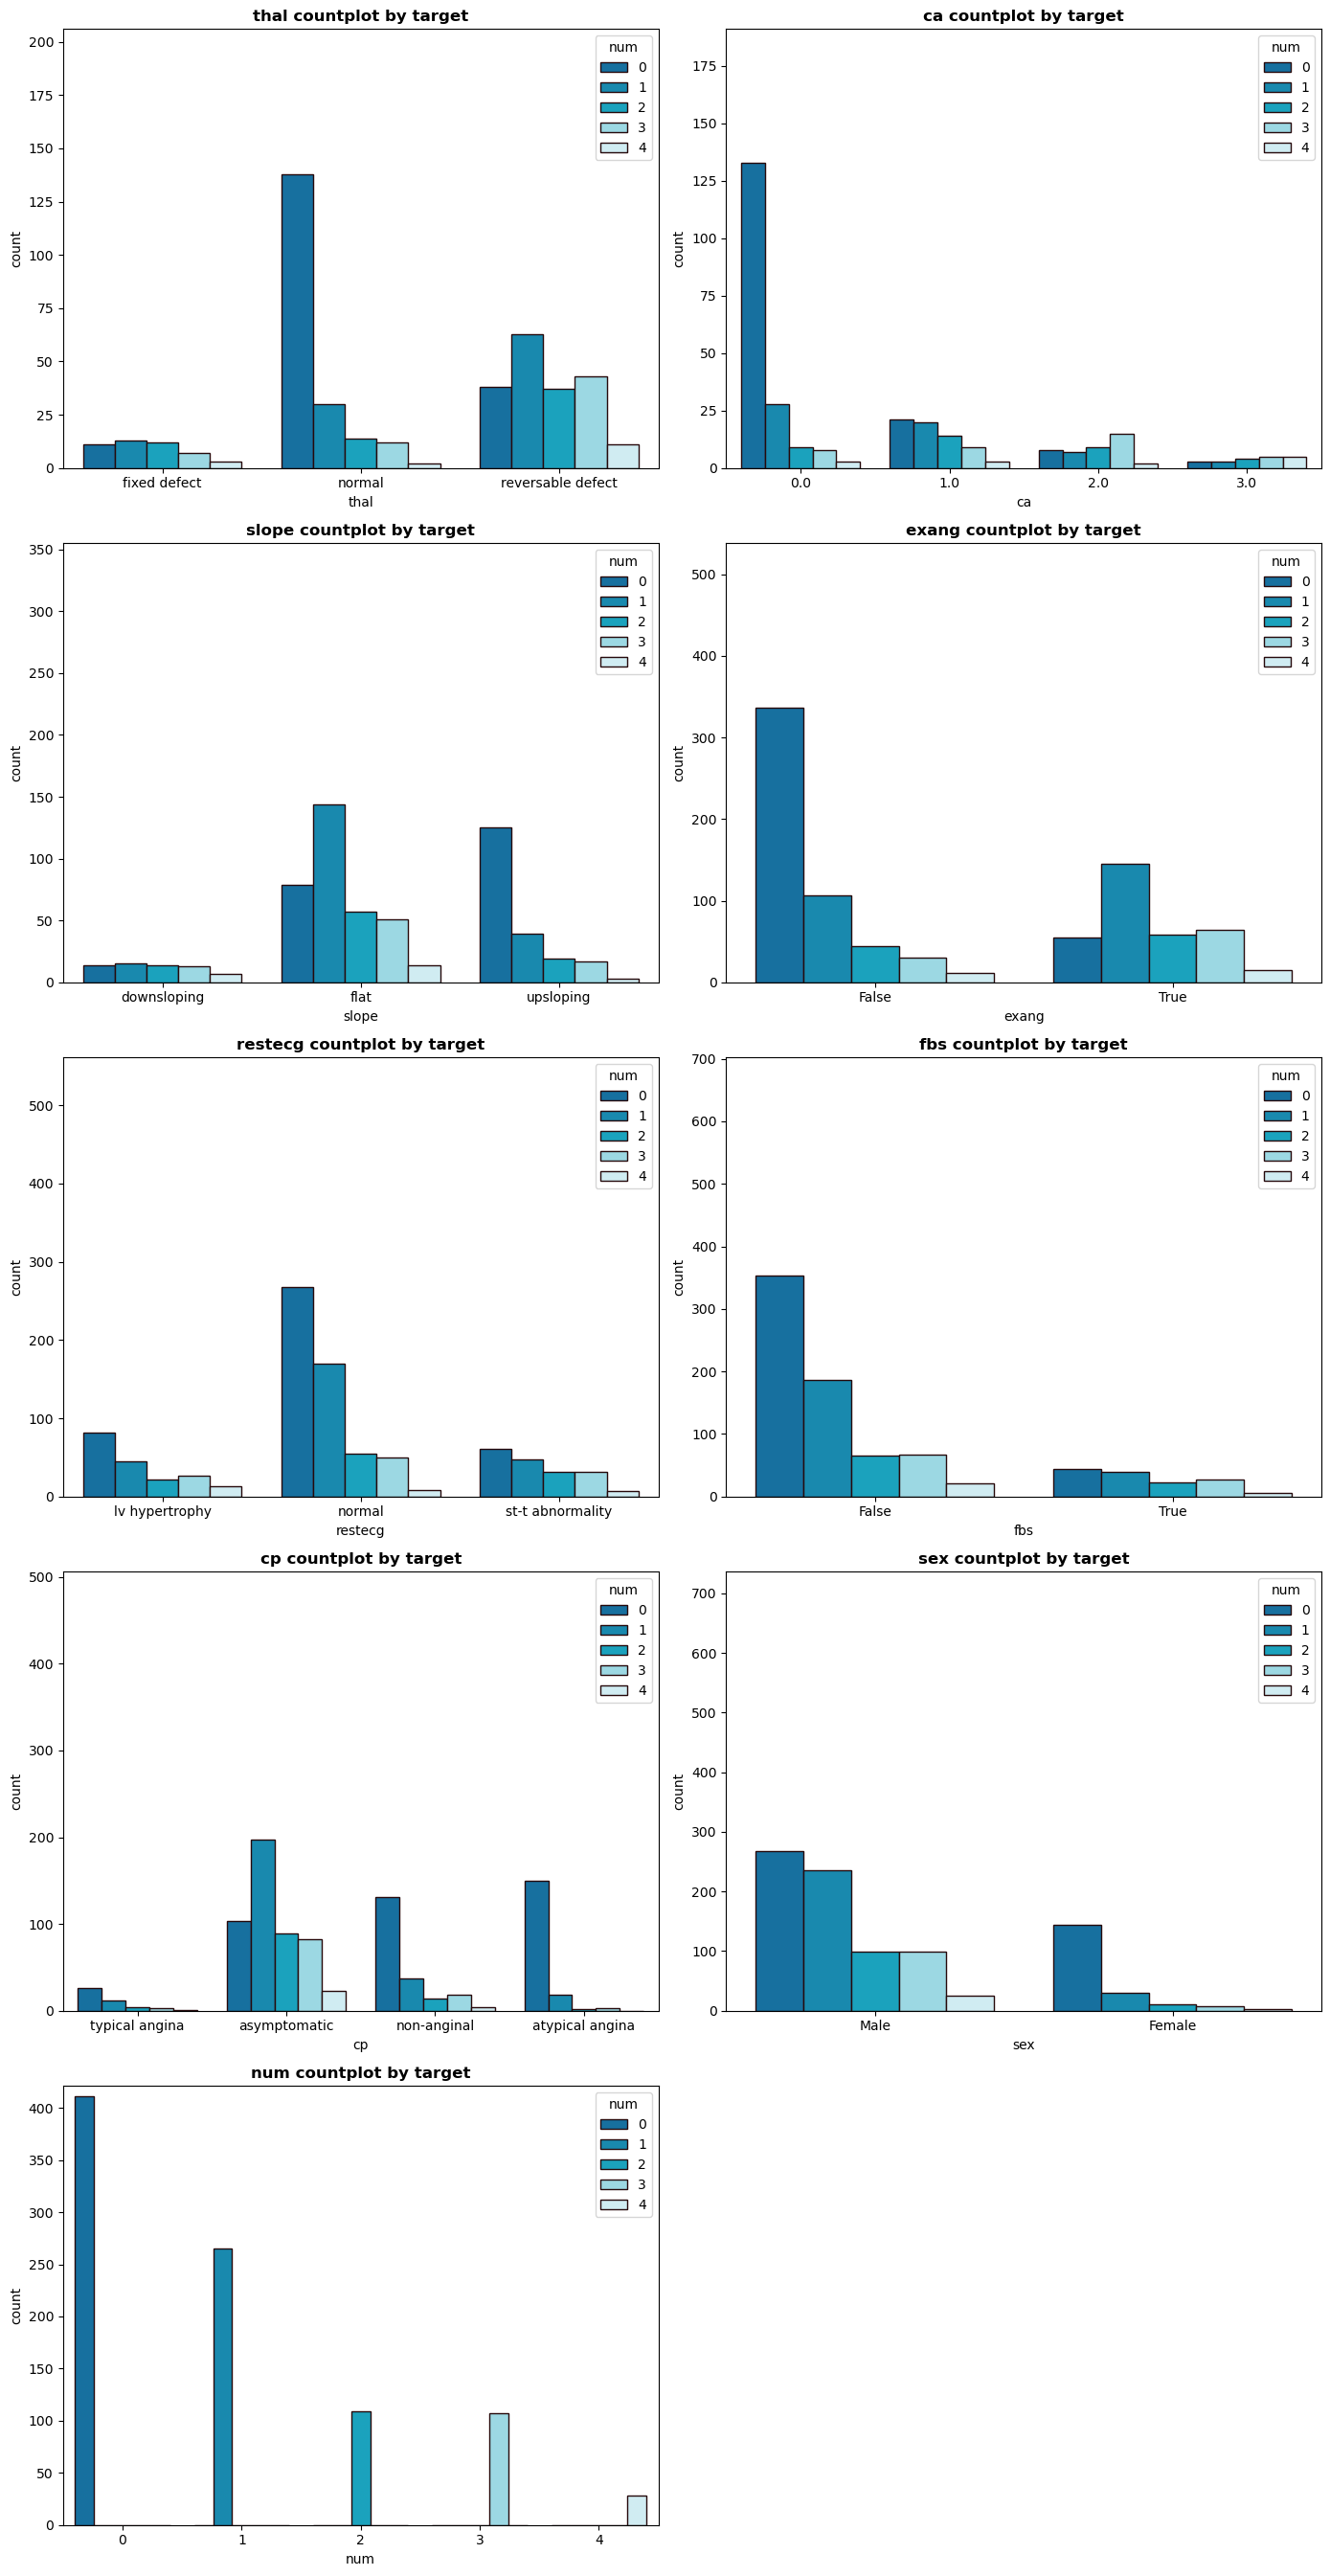

In [25]:
fig = plt.figure(figsize=(14, len(categorical_cols)*3))

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols)//2 + len(categorical_cols) % 2, 2, i+1)
    sns.countplot(x=col, hue='num', data=data, palette=palette , color='#26090b', edgecolor='#26090b')
    plt.title(f"{col} countplot by target", fontweight = 'bold')
    plt.ylim(0, data[col].value_counts().max() + 10)
    
plt.tight_layout()
plt.show()

- 

----
# ***6. Preprocess Data***
---

> ### ***6.1  Impoute Missing Values***

In [26]:
data.isna().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [27]:

def impute_categorical_missing_data(passed_col):
    
    df_null = data[data[passed_col].isnull()]
    df_not_null = data[data[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = data[data[passed_col].isnull()]
    df_not_null = data[data[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [28]:
missing_data_cols = data.isnull().sum()[data.isnull().sum() > 0].index.tolist()

for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((data[col].isnull().sum() / len(data)) * 100, 2))+"%")
    if col in categorical_cols:
        data[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        data[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.330289017341043 

RMSE = 17.291500568415525 

R2 = 0.06643800424641744 

Missing Values chol : 3.26%
MAE = 63.30028089887641 

RMSE = 85.44187131375053 

R2 = 0.4216907370685623 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.92 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 61.96 accuracy

Missing Values thalch : 5.98%
MAE = 17.078612716763008 

RMSE = 22.05256864437857 

R2 = 0.2928562964011666 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.19 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5706976744186046 

RMSE = 0.7968321290337539 

R2 = 0.3950888082731695 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 69.11 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 66.13 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 67.82 accuracy



In [29]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [30]:
categorical_cols.remove('num')
categorical_cols 

['thal', 'ca', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex']

In [31]:
numeric_cols

['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

> ### ***6.2 Build a Pipelines***

In [32]:
# data.dropna(inplace=True)

In [33]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.00,233.0,True,lv hypertrophy,150.00,False,2.300,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.00,286.0,False,lv hypertrophy,108.00,True,1.500,flat,3.0,normal,2
2,67,Male,asymptomatic,120.00,229.0,False,lv hypertrophy,129.00,True,2.600,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.00,250.0,False,normal,187.00,False,3.500,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.00,204.0,False,lv hypertrophy,172.00,False,1.400,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.00,333.0,True,st-t abnormality,154.00,False,0.000,upsloping,0.0,normal,1
916,62,Male,typical angina,138.38,139.0,False,st-t abnormality,143.20,False,2.026,flat,0.0,reversable defect,0
917,55,Male,asymptomatic,122.00,223.0,True,st-t abnormality,100.00,False,0.000,flat,1.0,fixed defect,2
918,58,Male,asymptomatic,148.35,385.0,True,lv hypertrophy,145.64,True,2.402,flat,0.0,normal,0


In [48]:
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

num_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer()),
    ('scaler', MinMaxScaler())
])

# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_pipeline, categorical_cols),
        ('num', num_pipeline, numeric_cols)
    ]
)
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['thal', 'ca', 'slope', 'exang', 'restecg',
                                  'fbs', 'cp', 'sex']),
                                ('num',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['oldpeak', 'thalch', 'chol', 'trestbps',
                                  'age'])])

In [49]:
X = data.drop(columns='num')
y = data.num

> ### ***6.3 Split Data***

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [51]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
880,62,Male,asymptomatic,143.30,170.0,False,st-t abnormality,120.00,True,3.000,downsloping,0.0,reversable defect
457,54,Male,non-anginal,150.00,205.3,False,normal,122.00,False,0.000,upsloping,0.0,reversable defect
797,51,Male,non-anginal,128.47,339.0,False,normal,143.27,True,3.062,flat,0.0,reversable defect
25,50,Female,non-anginal,120.00,219.0,False,normal,158.00,False,1.600,flat,0.0,normal
84,52,Male,atypical angina,120.00,325.0,False,normal,172.00,False,0.200,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,59,Male,asymptomatic,140.00,177.0,False,normal,162.00,True,0.000,upsloping,1.0,reversable defect
270,61,Male,asymptomatic,140.00,207.0,False,lv hypertrophy,138.00,True,1.900,upsloping,1.0,reversable defect
860,75,Male,asymptomatic,160.00,310.0,True,normal,112.00,True,2.000,downsloping,0.0,reversable defect
435,53,Female,atypical angina,140.00,216.0,False,normal,142.00,True,2.000,flat,0.0,normal


In [52]:
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)

column_names = preprocessor.get_feature_names_out()

X_train_pre = pd.DataFrame(X_train_pre, columns=column_names)
X_test_pre = pd.DataFrame(X_test_pre, columns=column_names)


In [53]:
X_train_pre

,cat__thal_fixed defect,cat__thal_normal,cat__thal_reversable defect,cat__ca_0.0,cat__ca_1.0,cat__ca_2.0,cat__ca_3.0,cat__slope_downsloping,cat__slope_flat,cat__slope_upsloping,...,cat__cp_atypical angina,cat__cp_non-anginal,cat__cp_typical angina,cat__sex_Female,cat__sex_Male,num__oldpeak,num__thalch,num__chol,num__trestbps,num__age
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.636364,0.422535,0.281924,0.71650,0.693878
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.295455,0.436620,0.340464,0.75000,0.530612
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.643409,0.586408,0.562189,0.64235,0.469388
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.477273,0.690141,0.363184,0.60000,0.448980
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.318182,0.788732,0.538972,0.60000,0.489796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.295455,0.718310,0.293532,0.70000,0.632653
732,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.511364,0.549296,0.343284,0.70000,0.673469
733,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.522727,0.366197,0.514096,0.80000,0.959184
734,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.522727,0.577465,0.358209,0.70000,0.510204



---
# ***7. Model Building***
---


 > ### ***7.1 Model Selection***

In [54]:
from sklearn.preprocessing import OrdinalEncoder
def evaluate_model_with_cv(model, X_train, y_train, cv=5):

    scores = cross_val_score(model, X_train, y_train, cv=cv)

    mean_score = scores.mean()

    return scores, mean_score

models = [
    DecisionTreeClassifier(max_depth=20, random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=42),
    SVC(kernel='linear', random_state=42),
    LogisticRegression(max_iter=1000, random_state=42),
    XGBClassifier(n_estimators=100, random_state=42),
    CatBoostClassifier(iterations=1000, random_state=42 ),
    lgb.LGBMClassifier(random_state=42)
]

model_scores = []

for model in models:
    scores, mean_score = evaluate_model_with_cv(model, X_train_pre, y_train, cv=5)
    model_scores.append({
        'model': model,
        'scores': scores,
        'mean_score': mean_score
    })

Learning rate set to 0.077013
0:	learn: 1.5259807	total: 3.73ms	remaining: 3.72s
1:	learn: 1.4575226	total: 7.05ms	remaining: 3.52s
2:	learn: 1.4052544	total: 9.95ms	remaining: 3.31s
3:	learn: 1.3547635	total: 12.9ms	remaining: 3.21s
4:	learn: 1.3185515	total: 15.9ms	remaining: 3.15s
5:	learn: 1.2745777	total: 19.1ms	remaining: 3.16s
6:	learn: 1.2394586	total: 22ms	remaining: 3.12s
7:	learn: 1.2006582	total: 24.8ms	remaining: 3.07s
8:	learn: 1.1722322	total: 27.7ms	remaining: 3.05s
9:	learn: 1.1444946	total: 30.8ms	remaining: 3.05s
10:	learn: 1.1205885	total: 33.7ms	remaining: 3.03s
11:	learn: 1.0987775	total: 36.4ms	remaining: 3s
12:	learn: 1.0753596	total: 39.1ms	remaining: 2.97s
13:	learn: 1.0566254	total: 41.9ms	remaining: 2.95s
14:	learn: 1.0396030	total: 44.9ms	remaining: 2.95s
15:	learn: 1.0209205	total: 47.8ms	remaining: 2.94s
16:	learn: 1.0046076	total: 48.9ms	remaining: 2.83s
17:	learn: 0.9885974	total: 52ms	remaining: 2.83s
18:	learn: 0.9726999	total: 54.8ms	remaining: 2.83s

192:	learn: 0.3819756	total: 594ms	remaining: 2.48s
193:	learn: 0.3803089	total: 598ms	remaining: 2.48s
194:	learn: 0.3794143	total: 601ms	remaining: 2.48s
195:	learn: 0.3778683	total: 604ms	remaining: 2.48s
196:	learn: 0.3759896	total: 607ms	remaining: 2.48s
197:	learn: 0.3740305	total: 611ms	remaining: 2.47s
198:	learn: 0.3735631	total: 616ms	remaining: 2.48s
199:	learn: 0.3724603	total: 619ms	remaining: 2.48s
200:	learn: 0.3709313	total: 623ms	remaining: 2.47s
201:	learn: 0.3704095	total: 626ms	remaining: 2.47s
202:	learn: 0.3690140	total: 629ms	remaining: 2.47s
203:	learn: 0.3676546	total: 632ms	remaining: 2.46s
204:	learn: 0.3662105	total: 635ms	remaining: 2.46s
205:	learn: 0.3644916	total: 638ms	remaining: 2.46s
206:	learn: 0.3635351	total: 641ms	remaining: 2.46s
207:	learn: 0.3627340	total: 645ms	remaining: 2.45s
208:	learn: 0.3607985	total: 648ms	remaining: 2.45s
209:	learn: 0.3600817	total: 651ms	remaining: 2.45s
210:	learn: 0.3581717	total: 654ms	remaining: 2.45s
211:	learn: 

386:	learn: 0.2159033	total: 1.19s	remaining: 1.88s
387:	learn: 0.2153637	total: 1.19s	remaining: 1.88s
388:	learn: 0.2146701	total: 1.19s	remaining: 1.88s
389:	learn: 0.2140138	total: 1.2s	remaining: 1.87s
390:	learn: 0.2137557	total: 1.2s	remaining: 1.87s
391:	learn: 0.2132681	total: 1.2s	remaining: 1.87s
392:	learn: 0.2128971	total: 1.21s	remaining: 1.86s
393:	learn: 0.2126920	total: 1.21s	remaining: 1.86s
394:	learn: 0.2120193	total: 1.21s	remaining: 1.86s
395:	learn: 0.2111509	total: 1.22s	remaining: 1.86s
396:	learn: 0.2106542	total: 1.22s	remaining: 1.85s
397:	learn: 0.2101357	total: 1.22s	remaining: 1.85s
398:	learn: 0.2098270	total: 1.23s	remaining: 1.85s
399:	learn: 0.2093632	total: 1.23s	remaining: 1.84s
400:	learn: 0.2090954	total: 1.23s	remaining: 1.84s
401:	learn: 0.2083819	total: 1.24s	remaining: 1.84s
402:	learn: 0.2074977	total: 1.24s	remaining: 1.83s
403:	learn: 0.2067447	total: 1.24s	remaining: 1.83s
404:	learn: 0.2065511	total: 1.24s	remaining: 1.83s
405:	learn: 0.2

579:	learn: 0.1364494	total: 1.78s	remaining: 1.29s
580:	learn: 0.1363021	total: 1.78s	remaining: 1.28s
581:	learn: 0.1359402	total: 1.78s	remaining: 1.28s
582:	learn: 0.1357310	total: 1.79s	remaining: 1.28s
583:	learn: 0.1355618	total: 1.79s	remaining: 1.27s
584:	learn: 0.1354190	total: 1.79s	remaining: 1.27s
585:	learn: 0.1352040	total: 1.8s	remaining: 1.27s
586:	learn: 0.1348949	total: 1.8s	remaining: 1.27s
587:	learn: 0.1346244	total: 1.8s	remaining: 1.26s
588:	learn: 0.1343271	total: 1.81s	remaining: 1.26s
589:	learn: 0.1342262	total: 1.81s	remaining: 1.26s
590:	learn: 0.1339713	total: 1.81s	remaining: 1.26s
591:	learn: 0.1337332	total: 1.82s	remaining: 1.25s
592:	learn: 0.1334970	total: 1.82s	remaining: 1.25s
593:	learn: 0.1332961	total: 1.82s	remaining: 1.25s
594:	learn: 0.1330050	total: 1.83s	remaining: 1.24s
595:	learn: 0.1328295	total: 1.83s	remaining: 1.24s
596:	learn: 0.1325539	total: 1.83s	remaining: 1.24s
597:	learn: 0.1322011	total: 1.84s	remaining: 1.23s
598:	learn: 0.1

771:	learn: 0.0975346	total: 2.37s	remaining: 700ms
772:	learn: 0.0973480	total: 2.37s	remaining: 697ms
773:	learn: 0.0971558	total: 2.38s	remaining: 694ms
774:	learn: 0.0969652	total: 2.38s	remaining: 691ms
775:	learn: 0.0968852	total: 2.38s	remaining: 688ms
776:	learn: 0.0966827	total: 2.38s	remaining: 685ms
777:	learn: 0.0965319	total: 2.39s	remaining: 682ms
778:	learn: 0.0962564	total: 2.39s	remaining: 679ms
779:	learn: 0.0961734	total: 2.4s	remaining: 676ms
780:	learn: 0.0960647	total: 2.4s	remaining: 673ms
781:	learn: 0.0958552	total: 2.4s	remaining: 670ms
782:	learn: 0.0956698	total: 2.4s	remaining: 667ms
783:	learn: 0.0955610	total: 2.41s	remaining: 664ms
784:	learn: 0.0953737	total: 2.41s	remaining: 661ms
785:	learn: 0.0952525	total: 2.42s	remaining: 658ms
786:	learn: 0.0951701	total: 2.42s	remaining: 655ms
787:	learn: 0.0949145	total: 2.42s	remaining: 652ms
788:	learn: 0.0948185	total: 2.43s	remaining: 649ms
789:	learn: 0.0947521	total: 2.43s	remaining: 646ms
790:	learn: 0.09

957:	learn: 0.0741707	total: 2.96s	remaining: 130ms
958:	learn: 0.0741228	total: 2.96s	remaining: 127ms
959:	learn: 0.0739867	total: 2.97s	remaining: 124ms
960:	learn: 0.0739023	total: 2.97s	remaining: 121ms
961:	learn: 0.0738189	total: 2.97s	remaining: 117ms
962:	learn: 0.0736967	total: 2.98s	remaining: 114ms
963:	learn: 0.0736242	total: 2.98s	remaining: 111ms
964:	learn: 0.0735162	total: 2.98s	remaining: 108ms
965:	learn: 0.0734076	total: 2.99s	remaining: 105ms
966:	learn: 0.0733490	total: 2.99s	remaining: 102ms
967:	learn: 0.0731930	total: 2.99s	remaining: 99ms
968:	learn: 0.0731482	total: 3s	remaining: 95.9ms
969:	learn: 0.0730786	total: 3s	remaining: 92.8ms
970:	learn: 0.0730062	total: 3s	remaining: 89.7ms
971:	learn: 0.0728704	total: 3.01s	remaining: 86.6ms
972:	learn: 0.0727885	total: 3.01s	remaining: 83.5ms
973:	learn: 0.0726569	total: 3.01s	remaining: 80.4ms
974:	learn: 0.0725633	total: 3.02s	remaining: 77.3ms
975:	learn: 0.0724766	total: 3.02s	remaining: 74.3ms
976:	learn: 0.

136:	learn: 0.4560222	total: 426ms	remaining: 2.68s
137:	learn: 0.4537836	total: 430ms	remaining: 2.68s
138:	learn: 0.4518022	total: 433ms	remaining: 2.68s
139:	learn: 0.4505098	total: 436ms	remaining: 2.68s
140:	learn: 0.4493031	total: 440ms	remaining: 2.68s
141:	learn: 0.4485216	total: 444ms	remaining: 2.68s
142:	learn: 0.4464502	total: 447ms	remaining: 2.68s
143:	learn: 0.4445346	total: 451ms	remaining: 2.68s
144:	learn: 0.4429974	total: 453ms	remaining: 2.67s
145:	learn: 0.4414750	total: 456ms	remaining: 2.67s
146:	learn: 0.4395491	total: 459ms	remaining: 2.66s
147:	learn: 0.4371129	total: 462ms	remaining: 2.66s
148:	learn: 0.4344718	total: 465ms	remaining: 2.66s
149:	learn: 0.4329613	total: 468ms	remaining: 2.65s
150:	learn: 0.4316852	total: 471ms	remaining: 2.65s
151:	learn: 0.4291014	total: 474ms	remaining: 2.65s
152:	learn: 0.4271825	total: 477ms	remaining: 2.64s
153:	learn: 0.4253218	total: 480ms	remaining: 2.64s
154:	learn: 0.4242388	total: 483ms	remaining: 2.63s
155:	learn: 

327:	learn: 0.2364375	total: 1.02s	remaining: 2.08s
328:	learn: 0.2353481	total: 1.02s	remaining: 2.08s
329:	learn: 0.2349331	total: 1.02s	remaining: 2.08s
330:	learn: 0.2336366	total: 1.03s	remaining: 2.08s
331:	learn: 0.2331825	total: 1.03s	remaining: 2.07s
332:	learn: 0.2327125	total: 1.03s	remaining: 2.07s
333:	learn: 0.2322971	total: 1.04s	remaining: 2.07s
334:	learn: 0.2315382	total: 1.04s	remaining: 2.07s
335:	learn: 0.2311851	total: 1.04s	remaining: 2.06s
336:	learn: 0.2308360	total: 1.05s	remaining: 2.06s
337:	learn: 0.2302049	total: 1.05s	remaining: 2.06s
338:	learn: 0.2297337	total: 1.05s	remaining: 2.06s
339:	learn: 0.2291990	total: 1.06s	remaining: 2.05s
340:	learn: 0.2283345	total: 1.06s	remaining: 2.05s
341:	learn: 0.2278266	total: 1.06s	remaining: 2.05s
342:	learn: 0.2270029	total: 1.07s	remaining: 2.04s
343:	learn: 0.2265269	total: 1.07s	remaining: 2.04s
344:	learn: 0.2254231	total: 1.07s	remaining: 2.04s
345:	learn: 0.2242820	total: 1.08s	remaining: 2.04s
346:	learn: 

517:	learn: 0.1434819	total: 1.61s	remaining: 1.5s
518:	learn: 0.1431782	total: 1.61s	remaining: 1.49s
519:	learn: 0.1429713	total: 1.61s	remaining: 1.49s
520:	learn: 0.1427497	total: 1.62s	remaining: 1.49s
521:	learn: 0.1422789	total: 1.62s	remaining: 1.48s
522:	learn: 0.1420586	total: 1.63s	remaining: 1.48s
523:	learn: 0.1417791	total: 1.63s	remaining: 1.48s
524:	learn: 0.1414235	total: 1.63s	remaining: 1.48s
525:	learn: 0.1411329	total: 1.64s	remaining: 1.47s
526:	learn: 0.1407329	total: 1.64s	remaining: 1.47s
527:	learn: 0.1404029	total: 1.64s	remaining: 1.47s
528:	learn: 0.1400402	total: 1.64s	remaining: 1.46s
529:	learn: 0.1397429	total: 1.65s	remaining: 1.46s
530:	learn: 0.1395069	total: 1.65s	remaining: 1.46s
531:	learn: 0.1393909	total: 1.65s	remaining: 1.45s
532:	learn: 0.1390213	total: 1.66s	remaining: 1.45s
533:	learn: 0.1387512	total: 1.66s	remaining: 1.45s
534:	learn: 0.1385333	total: 1.66s	remaining: 1.45s
535:	learn: 0.1382920	total: 1.67s	remaining: 1.44s
536:	learn: 0

715:	learn: 0.0962449	total: 2.2s	remaining: 874ms
716:	learn: 0.0960823	total: 2.21s	remaining: 871ms
717:	learn: 0.0959369	total: 2.21s	remaining: 868ms
718:	learn: 0.0957905	total: 2.21s	remaining: 865ms
719:	learn: 0.0956330	total: 2.22s	remaining: 862ms
720:	learn: 0.0954845	total: 2.22s	remaining: 860ms
721:	learn: 0.0953313	total: 2.22s	remaining: 857ms
722:	learn: 0.0952268	total: 2.23s	remaining: 853ms
723:	learn: 0.0951243	total: 2.23s	remaining: 850ms
724:	learn: 0.0950086	total: 2.23s	remaining: 847ms
725:	learn: 0.0948591	total: 2.24s	remaining: 844ms
726:	learn: 0.0946510	total: 2.24s	remaining: 841ms
727:	learn: 0.0944240	total: 2.24s	remaining: 838ms
728:	learn: 0.0941576	total: 2.24s	remaining: 835ms
729:	learn: 0.0938491	total: 2.25s	remaining: 831ms
730:	learn: 0.0937662	total: 2.25s	remaining: 828ms
731:	learn: 0.0935702	total: 2.25s	remaining: 825ms
732:	learn: 0.0935411	total: 2.26s	remaining: 822ms
733:	learn: 0.0933681	total: 2.26s	remaining: 819ms
734:	learn: 0

910:	learn: 0.0708922	total: 2.79s	remaining: 273ms
911:	learn: 0.0708288	total: 2.8s	remaining: 270ms
912:	learn: 0.0707339	total: 2.8s	remaining: 267ms
913:	learn: 0.0705991	total: 2.8s	remaining: 264ms
914:	learn: 0.0704789	total: 2.81s	remaining: 261ms
915:	learn: 0.0703882	total: 2.81s	remaining: 258ms
916:	learn: 0.0703242	total: 2.81s	remaining: 255ms
917:	learn: 0.0702529	total: 2.82s	remaining: 252ms
918:	learn: 0.0700879	total: 2.82s	remaining: 249ms
919:	learn: 0.0699596	total: 2.82s	remaining: 245ms
920:	learn: 0.0698367	total: 2.83s	remaining: 242ms
921:	learn: 0.0697061	total: 2.83s	remaining: 239ms
922:	learn: 0.0695800	total: 2.83s	remaining: 236ms
923:	learn: 0.0694898	total: 2.83s	remaining: 233ms
924:	learn: 0.0693764	total: 2.84s	remaining: 230ms
925:	learn: 0.0692520	total: 2.84s	remaining: 227ms
926:	learn: 0.0691229	total: 2.85s	remaining: 224ms
927:	learn: 0.0690845	total: 2.85s	remaining: 221ms
928:	learn: 0.0690315	total: 2.85s	remaining: 218ms
929:	learn: 0.0

94:	learn: 0.5744033	total: 296ms	remaining: 2.82s
95:	learn: 0.5713416	total: 299ms	remaining: 2.82s
96:	learn: 0.5689689	total: 303ms	remaining: 2.82s
97:	learn: 0.5659133	total: 306ms	remaining: 2.82s
98:	learn: 0.5623259	total: 310ms	remaining: 2.82s
99:	learn: 0.5593469	total: 314ms	remaining: 2.82s
100:	learn: 0.5559632	total: 317ms	remaining: 2.82s
101:	learn: 0.5543679	total: 320ms	remaining: 2.81s
102:	learn: 0.5524158	total: 323ms	remaining: 2.81s
103:	learn: 0.5510052	total: 325ms	remaining: 2.8s
104:	learn: 0.5488020	total: 329ms	remaining: 2.8s
105:	learn: 0.5460562	total: 332ms	remaining: 2.8s
106:	learn: 0.5439982	total: 335ms	remaining: 2.79s
107:	learn: 0.5408229	total: 338ms	remaining: 2.79s
108:	learn: 0.5393019	total: 341ms	remaining: 2.79s
109:	learn: 0.5367264	total: 344ms	remaining: 2.79s
110:	learn: 0.5353274	total: 347ms	remaining: 2.78s
111:	learn: 0.5328306	total: 350ms	remaining: 2.78s
112:	learn: 0.5306041	total: 353ms	remaining: 2.77s
113:	learn: 0.5278250

290:	learn: 0.2833909	total: 886ms	remaining: 2.16s
291:	learn: 0.2825565	total: 890ms	remaining: 2.16s
292:	learn: 0.2815997	total: 893ms	remaining: 2.15s
293:	learn: 0.2811619	total: 896ms	remaining: 2.15s
294:	learn: 0.2806934	total: 900ms	remaining: 2.15s
295:	learn: 0.2798912	total: 904ms	remaining: 2.15s
296:	learn: 0.2790941	total: 908ms	remaining: 2.15s
297:	learn: 0.2781018	total: 911ms	remaining: 2.15s
298:	learn: 0.2774692	total: 914ms	remaining: 2.14s
299:	learn: 0.2767325	total: 917ms	remaining: 2.14s
300:	learn: 0.2757210	total: 920ms	remaining: 2.14s
301:	learn: 0.2745312	total: 923ms	remaining: 2.13s
302:	learn: 0.2737811	total: 926ms	remaining: 2.13s
303:	learn: 0.2726683	total: 928ms	remaining: 2.13s
304:	learn: 0.2718069	total: 931ms	remaining: 2.12s
305:	learn: 0.2708479	total: 934ms	remaining: 2.12s
306:	learn: 0.2696985	total: 937ms	remaining: 2.12s
307:	learn: 0.2687406	total: 940ms	remaining: 2.11s
308:	learn: 0.2679591	total: 943ms	remaining: 2.11s
309:	learn: 

486:	learn: 0.1697150	total: 1.48s	remaining: 1.56s
487:	learn: 0.1692213	total: 1.48s	remaining: 1.56s
488:	learn: 0.1690727	total: 1.49s	remaining: 1.55s
489:	learn: 0.1686307	total: 1.49s	remaining: 1.55s
490:	learn: 0.1683036	total: 1.5s	remaining: 1.55s
491:	learn: 0.1680315	total: 1.5s	remaining: 1.55s
492:	learn: 0.1678361	total: 1.5s	remaining: 1.54s
493:	learn: 0.1671704	total: 1.5s	remaining: 1.54s
494:	learn: 0.1667696	total: 1.51s	remaining: 1.54s
495:	learn: 0.1664074	total: 1.51s	remaining: 1.54s
496:	learn: 0.1659122	total: 1.51s	remaining: 1.53s
497:	learn: 0.1654433	total: 1.52s	remaining: 1.53s
498:	learn: 0.1651390	total: 1.52s	remaining: 1.53s
499:	learn: 0.1646574	total: 1.52s	remaining: 1.52s
500:	learn: 0.1639976	total: 1.53s	remaining: 1.52s
501:	learn: 0.1636444	total: 1.53s	remaining: 1.52s
502:	learn: 0.1632861	total: 1.53s	remaining: 1.51s
503:	learn: 0.1629064	total: 1.53s	remaining: 1.51s
504:	learn: 0.1624783	total: 1.54s	remaining: 1.51s
505:	learn: 0.16

680:	learn: 0.1132651	total: 2.08s	remaining: 972ms
681:	learn: 0.1131483	total: 2.08s	remaining: 969ms
682:	learn: 0.1129734	total: 2.08s	remaining: 966ms
683:	learn: 0.1127848	total: 2.08s	remaining: 963ms
684:	learn: 0.1126150	total: 2.09s	remaining: 961ms
685:	learn: 0.1124553	total: 2.09s	remaining: 958ms
686:	learn: 0.1122156	total: 2.1s	remaining: 955ms
687:	learn: 0.1119629	total: 2.1s	remaining: 952ms
688:	learn: 0.1117630	total: 2.1s	remaining: 949ms
689:	learn: 0.1115666	total: 2.11s	remaining: 946ms
690:	learn: 0.1112819	total: 2.11s	remaining: 943ms
691:	learn: 0.1111587	total: 2.11s	remaining: 940ms
692:	learn: 0.1109918	total: 2.12s	remaining: 937ms
693:	learn: 0.1107965	total: 2.12s	remaining: 934ms
694:	learn: 0.1105547	total: 2.12s	remaining: 931ms
695:	learn: 0.1102476	total: 2.12s	remaining: 928ms
696:	learn: 0.1101657	total: 2.13s	remaining: 925ms
697:	learn: 0.1099826	total: 2.13s	remaining: 922ms
698:	learn: 0.1097358	total: 2.13s	remaining: 918ms
699:	learn: 0.1

877:	learn: 0.0821034	total: 2.67s	remaining: 370ms
878:	learn: 0.0820032	total: 2.67s	remaining: 367ms
879:	learn: 0.0819414	total: 2.67s	remaining: 364ms
880:	learn: 0.0818163	total: 2.68s	remaining: 361ms
881:	learn: 0.0817111	total: 2.68s	remaining: 358ms
882:	learn: 0.0816549	total: 2.68s	remaining: 356ms
883:	learn: 0.0816013	total: 2.69s	remaining: 353ms
884:	learn: 0.0814709	total: 2.69s	remaining: 350ms
885:	learn: 0.0813693	total: 2.69s	remaining: 347ms
886:	learn: 0.0812363	total: 2.7s	remaining: 343ms
887:	learn: 0.0811069	total: 2.7s	remaining: 340ms
888:	learn: 0.0809680	total: 2.7s	remaining: 337ms
889:	learn: 0.0809091	total: 2.71s	remaining: 334ms
890:	learn: 0.0808393	total: 2.71s	remaining: 331ms
891:	learn: 0.0807462	total: 2.71s	remaining: 328ms
892:	learn: 0.0805578	total: 2.71s	remaining: 325ms
893:	learn: 0.0803559	total: 2.72s	remaining: 322ms
894:	learn: 0.0802455	total: 2.72s	remaining: 319ms
895:	learn: 0.0801157	total: 2.72s	remaining: 316ms
896:	learn: 0.0

67:	learn: 0.6404850	total: 201ms	remaining: 2.76s
68:	learn: 0.6385427	total: 205ms	remaining: 2.76s
69:	learn: 0.6354855	total: 208ms	remaining: 2.76s
70:	learn: 0.6324924	total: 211ms	remaining: 2.76s
71:	learn: 0.6288885	total: 214ms	remaining: 2.76s
72:	learn: 0.6248893	total: 219ms	remaining: 2.78s
73:	learn: 0.6208006	total: 222ms	remaining: 2.78s
74:	learn: 0.6185060	total: 225ms	remaining: 2.77s
75:	learn: 0.6154021	total: 229ms	remaining: 2.79s
76:	learn: 0.6118361	total: 233ms	remaining: 2.8s
77:	learn: 0.6089928	total: 236ms	remaining: 2.79s
78:	learn: 0.6058807	total: 239ms	remaining: 2.79s
79:	learn: 0.6009956	total: 243ms	remaining: 2.79s
80:	learn: 0.5977811	total: 246ms	remaining: 2.79s
81:	learn: 0.5948764	total: 250ms	remaining: 2.79s
82:	learn: 0.5922532	total: 252ms	remaining: 2.79s
83:	learn: 0.5900000	total: 255ms	remaining: 2.78s
84:	learn: 0.5860959	total: 258ms	remaining: 2.78s
85:	learn: 0.5825164	total: 261ms	remaining: 2.78s
86:	learn: 0.5796702	total: 264m

250:	learn: 0.3130394	total: 789ms	remaining: 2.35s
251:	learn: 0.3115453	total: 792ms	remaining: 2.35s
252:	learn: 0.3104814	total: 796ms	remaining: 2.35s
253:	learn: 0.3091346	total: 799ms	remaining: 2.35s
254:	learn: 0.3082559	total: 802ms	remaining: 2.34s
255:	learn: 0.3073660	total: 806ms	remaining: 2.34s
256:	learn: 0.3059923	total: 809ms	remaining: 2.34s
257:	learn: 0.3055075	total: 812ms	remaining: 2.34s
258:	learn: 0.3043314	total: 816ms	remaining: 2.33s
259:	learn: 0.3035846	total: 820ms	remaining: 2.33s
260:	learn: 0.3025744	total: 824ms	remaining: 2.33s
261:	learn: 0.3020232	total: 827ms	remaining: 2.33s
262:	learn: 0.3008642	total: 831ms	remaining: 2.33s
263:	learn: 0.2998959	total: 834ms	remaining: 2.33s
264:	learn: 0.2981885	total: 838ms	remaining: 2.32s
265:	learn: 0.2976321	total: 841ms	remaining: 2.32s
266:	learn: 0.2964969	total: 844ms	remaining: 2.32s
267:	learn: 0.2954637	total: 847ms	remaining: 2.31s
268:	learn: 0.2949908	total: 851ms	remaining: 2.31s
269:	learn: 

433:	learn: 0.1858731	total: 1.38s	remaining: 1.8s
434:	learn: 0.1854040	total: 1.38s	remaining: 1.79s
435:	learn: 0.1850332	total: 1.38s	remaining: 1.79s
436:	learn: 0.1846105	total: 1.39s	remaining: 1.79s
437:	learn: 0.1841468	total: 1.39s	remaining: 1.78s
438:	learn: 0.1837486	total: 1.39s	remaining: 1.78s
439:	learn: 0.1833097	total: 1.4s	remaining: 1.78s
440:	learn: 0.1829360	total: 1.4s	remaining: 1.78s
441:	learn: 0.1826993	total: 1.4s	remaining: 1.77s
442:	learn: 0.1822255	total: 1.41s	remaining: 1.77s
443:	learn: 0.1818347	total: 1.41s	remaining: 1.77s
444:	learn: 0.1809992	total: 1.41s	remaining: 1.76s
445:	learn: 0.1802115	total: 1.42s	remaining: 1.76s
446:	learn: 0.1797537	total: 1.42s	remaining: 1.76s
447:	learn: 0.1792243	total: 1.42s	remaining: 1.75s
448:	learn: 0.1790051	total: 1.43s	remaining: 1.75s
449:	learn: 0.1787028	total: 1.43s	remaining: 1.75s
450:	learn: 0.1781449	total: 1.43s	remaining: 1.75s
451:	learn: 0.1777487	total: 1.44s	remaining: 1.74s
452:	learn: 0.17

617:	learn: 0.1229652	total: 1.96s	remaining: 1.21s
618:	learn: 0.1227449	total: 1.97s	remaining: 1.21s
619:	learn: 0.1223721	total: 1.97s	remaining: 1.21s
620:	learn: 0.1221586	total: 1.97s	remaining: 1.2s
621:	learn: 0.1220485	total: 1.98s	remaining: 1.2s
622:	learn: 0.1218113	total: 1.98s	remaining: 1.2s
623:	learn: 0.1214002	total: 1.99s	remaining: 1.2s
624:	learn: 0.1210503	total: 1.99s	remaining: 1.19s
625:	learn: 0.1207637	total: 1.99s	remaining: 1.19s
626:	learn: 0.1205280	total: 2s	remaining: 1.19s
627:	learn: 0.1202216	total: 2s	remaining: 1.18s
628:	learn: 0.1200293	total: 2s	remaining: 1.18s
629:	learn: 0.1198346	total: 2s	remaining: 1.18s
630:	learn: 0.1195513	total: 2.01s	remaining: 1.17s
631:	learn: 0.1193291	total: 2.01s	remaining: 1.17s
632:	learn: 0.1190182	total: 2.01s	remaining: 1.17s
633:	learn: 0.1187761	total: 2.02s	remaining: 1.17s
634:	learn: 0.1185259	total: 2.02s	remaining: 1.16s
635:	learn: 0.1182727	total: 2.02s	remaining: 1.16s
636:	learn: 0.1180230	total:

793:	learn: 0.0887746	total: 2.55s	remaining: 663ms
794:	learn: 0.0886561	total: 2.56s	remaining: 660ms
795:	learn: 0.0885009	total: 2.56s	remaining: 656ms
796:	learn: 0.0883813	total: 2.56s	remaining: 653ms
797:	learn: 0.0882791	total: 2.57s	remaining: 650ms
798:	learn: 0.0880927	total: 2.57s	remaining: 647ms
799:	learn: 0.0879664	total: 2.58s	remaining: 644ms
800:	learn: 0.0878355	total: 2.58s	remaining: 641ms
801:	learn: 0.0877504	total: 2.58s	remaining: 638ms
802:	learn: 0.0876296	total: 2.59s	remaining: 635ms
803:	learn: 0.0874635	total: 2.59s	remaining: 632ms
804:	learn: 0.0874020	total: 2.6s	remaining: 629ms
805:	learn: 0.0872066	total: 2.6s	remaining: 626ms
806:	learn: 0.0870039	total: 2.6s	remaining: 622ms
807:	learn: 0.0867775	total: 2.6s	remaining: 619ms
808:	learn: 0.0866115	total: 2.61s	remaining: 616ms
809:	learn: 0.0864410	total: 2.61s	remaining: 613ms
810:	learn: 0.0862761	total: 2.62s	remaining: 610ms
811:	learn: 0.0861484	total: 2.62s	remaining: 607ms
812:	learn: 0.08

973:	learn: 0.0673046	total: 3.15s	remaining: 84ms
974:	learn: 0.0671814	total: 3.15s	remaining: 80.7ms
975:	learn: 0.0670558	total: 3.15s	remaining: 77.5ms
976:	learn: 0.0669472	total: 3.15s	remaining: 74.3ms
977:	learn: 0.0668411	total: 3.16s	remaining: 71.1ms
978:	learn: 0.0667802	total: 3.16s	remaining: 67.8ms
979:	learn: 0.0666785	total: 3.17s	remaining: 64.6ms
980:	learn: 0.0666279	total: 3.17s	remaining: 61.4ms
981:	learn: 0.0665603	total: 3.17s	remaining: 58.1ms
982:	learn: 0.0663969	total: 3.17s	remaining: 54.9ms
983:	learn: 0.0662947	total: 3.18s	remaining: 51.7ms
984:	learn: 0.0662417	total: 3.18s	remaining: 48.5ms
985:	learn: 0.0661445	total: 3.18s	remaining: 45.2ms
986:	learn: 0.0660509	total: 3.19s	remaining: 42ms
987:	learn: 0.0659644	total: 3.19s	remaining: 38.8ms
988:	learn: 0.0658554	total: 3.19s	remaining: 35.5ms
989:	learn: 0.0657463	total: 3.2s	remaining: 32.3ms
990:	learn: 0.0656835	total: 3.2s	remaining: 29.1ms
991:	learn: 0.0655635	total: 3.2s	remaining: 25.8ms


153:	learn: 0.4400672	total: 480ms	remaining: 2.64s
154:	learn: 0.4377155	total: 483ms	remaining: 2.63s
155:	learn: 0.4363924	total: 487ms	remaining: 2.63s
156:	learn: 0.4341418	total: 490ms	remaining: 2.63s
157:	learn: 0.4323742	total: 493ms	remaining: 2.63s
158:	learn: 0.4310465	total: 497ms	remaining: 2.63s
159:	learn: 0.4299597	total: 501ms	remaining: 2.63s
160:	learn: 0.4282789	total: 504ms	remaining: 2.63s
161:	learn: 0.4255221	total: 507ms	remaining: 2.62s
162:	learn: 0.4241312	total: 510ms	remaining: 2.62s
163:	learn: 0.4223115	total: 513ms	remaining: 2.62s
164:	learn: 0.4216358	total: 516ms	remaining: 2.61s
165:	learn: 0.4200791	total: 519ms	remaining: 2.61s
166:	learn: 0.4177824	total: 522ms	remaining: 2.6s
167:	learn: 0.4164275	total: 525ms	remaining: 2.6s
168:	learn: 0.4148186	total: 528ms	remaining: 2.6s
169:	learn: 0.4127720	total: 531ms	remaining: 2.59s
170:	learn: 0.4120951	total: 534ms	remaining: 2.59s
171:	learn: 0.4102795	total: 537ms	remaining: 2.58s
172:	learn: 0.4

336:	learn: 0.2314035	total: 1.07s	remaining: 2.1s
337:	learn: 0.2305399	total: 1.07s	remaining: 2.1s
338:	learn: 0.2298665	total: 1.08s	remaining: 2.1s
339:	learn: 0.2293565	total: 1.08s	remaining: 2.1s
340:	learn: 0.2286017	total: 1.08s	remaining: 2.09s
341:	learn: 0.2280458	total: 1.08s	remaining: 2.09s
342:	learn: 0.2270978	total: 1.09s	remaining: 2.08s
343:	learn: 0.2266564	total: 1.09s	remaining: 2.08s
344:	learn: 0.2262336	total: 1.09s	remaining: 2.08s
345:	learn: 0.2255659	total: 1.1s	remaining: 2.08s
346:	learn: 0.2251033	total: 1.1s	remaining: 2.08s
347:	learn: 0.2247432	total: 1.11s	remaining: 2.08s
348:	learn: 0.2242190	total: 1.11s	remaining: 2.07s
349:	learn: 0.2235284	total: 1.11s	remaining: 2.07s
350:	learn: 0.2228434	total: 1.12s	remaining: 2.07s
351:	learn: 0.2222846	total: 1.12s	remaining: 2.06s
352:	learn: 0.2217626	total: 1.13s	remaining: 2.06s
353:	learn: 0.2213810	total: 1.13s	remaining: 2.06s
354:	learn: 0.2208442	total: 1.13s	remaining: 2.06s
355:	learn: 0.2202

512:	learn: 0.1482741	total: 1.66s	remaining: 1.58s
513:	learn: 0.1479930	total: 1.66s	remaining: 1.57s
514:	learn: 0.1476383	total: 1.67s	remaining: 1.57s
515:	learn: 0.1473281	total: 1.67s	remaining: 1.57s
516:	learn: 0.1469961	total: 1.68s	remaining: 1.56s
517:	learn: 0.1467883	total: 1.68s	remaining: 1.56s
518:	learn: 0.1464900	total: 1.68s	remaining: 1.56s
519:	learn: 0.1462640	total: 1.69s	remaining: 1.56s
520:	learn: 0.1458253	total: 1.69s	remaining: 1.55s
521:	learn: 0.1455065	total: 1.7s	remaining: 1.55s
522:	learn: 0.1452130	total: 1.7s	remaining: 1.55s
523:	learn: 0.1447262	total: 1.7s	remaining: 1.54s
524:	learn: 0.1444039	total: 1.71s	remaining: 1.54s
525:	learn: 0.1439815	total: 1.71s	remaining: 1.54s
526:	learn: 0.1437070	total: 1.71s	remaining: 1.54s
527:	learn: 0.1434273	total: 1.72s	remaining: 1.53s
528:	learn: 0.1430612	total: 1.72s	remaining: 1.53s
529:	learn: 0.1427607	total: 1.72s	remaining: 1.53s
530:	learn: 0.1424299	total: 1.72s	remaining: 1.52s
531:	learn: 0.1

689:	learn: 0.1025433	total: 2.25s	remaining: 1.01s
690:	learn: 0.1023253	total: 2.25s	remaining: 1.01s
691:	learn: 0.1021247	total: 2.26s	remaining: 1s
692:	learn: 0.1019245	total: 2.26s	remaining: 1s
693:	learn: 0.1018452	total: 2.27s	remaining: 999ms
694:	learn: 0.1016141	total: 2.27s	remaining: 996ms
695:	learn: 0.1013798	total: 2.27s	remaining: 992ms
696:	learn: 0.1011711	total: 2.28s	remaining: 990ms
697:	learn: 0.1010615	total: 2.28s	remaining: 986ms
698:	learn: 0.1009146	total: 2.28s	remaining: 983ms
699:	learn: 0.1008265	total: 2.29s	remaining: 980ms
700:	learn: 0.1007239	total: 2.29s	remaining: 977ms
701:	learn: 0.1005057	total: 2.29s	remaining: 973ms
702:	learn: 0.1002637	total: 2.29s	remaining: 970ms
703:	learn: 0.1001142	total: 2.3s	remaining: 967ms
704:	learn: 0.0999791	total: 2.3s	remaining: 963ms
705:	learn: 0.0998511	total: 2.31s	remaining: 960ms
706:	learn: 0.0997447	total: 2.31s	remaining: 957ms
707:	learn: 0.0996093	total: 2.31s	remaining: 953ms
708:	learn: 0.099458

874:	learn: 0.0767418	total: 2.84s	remaining: 406ms
875:	learn: 0.0765963	total: 2.85s	remaining: 403ms
876:	learn: 0.0764684	total: 2.85s	remaining: 400ms
877:	learn: 0.0763593	total: 2.85s	remaining: 397ms
878:	learn: 0.0762258	total: 2.86s	remaining: 393ms
879:	learn: 0.0761338	total: 2.86s	remaining: 390ms
880:	learn: 0.0760485	total: 2.86s	remaining: 387ms
881:	learn: 0.0759374	total: 2.87s	remaining: 384ms
882:	learn: 0.0758426	total: 2.87s	remaining: 380ms
883:	learn: 0.0757607	total: 2.87s	remaining: 377ms
884:	learn: 0.0756565	total: 2.88s	remaining: 374ms
885:	learn: 0.0755531	total: 2.88s	remaining: 371ms
886:	learn: 0.0754988	total: 2.88s	remaining: 367ms
887:	learn: 0.0754012	total: 2.89s	remaining: 364ms
888:	learn: 0.0753076	total: 2.89s	remaining: 361ms
889:	learn: 0.0751942	total: 2.89s	remaining: 358ms
890:	learn: 0.0750766	total: 2.9s	remaining: 354ms
891:	learn: 0.0749585	total: 2.9s	remaining: 351ms
892:	learn: 0.0748362	total: 2.9s	remaining: 348ms
893:	learn: 0.0

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 589, number of used features: 27
[LightGBM] [Info] Start training from score -0.783715
[LightGBM] [Info] Start training from score -1.254462
[LightGBM] [Info] Start training from score -2.158918
[LightGBM] [Info] Start training from score -2.204039
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

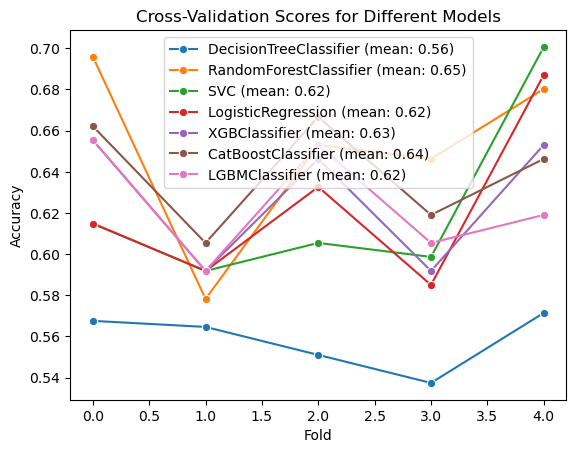

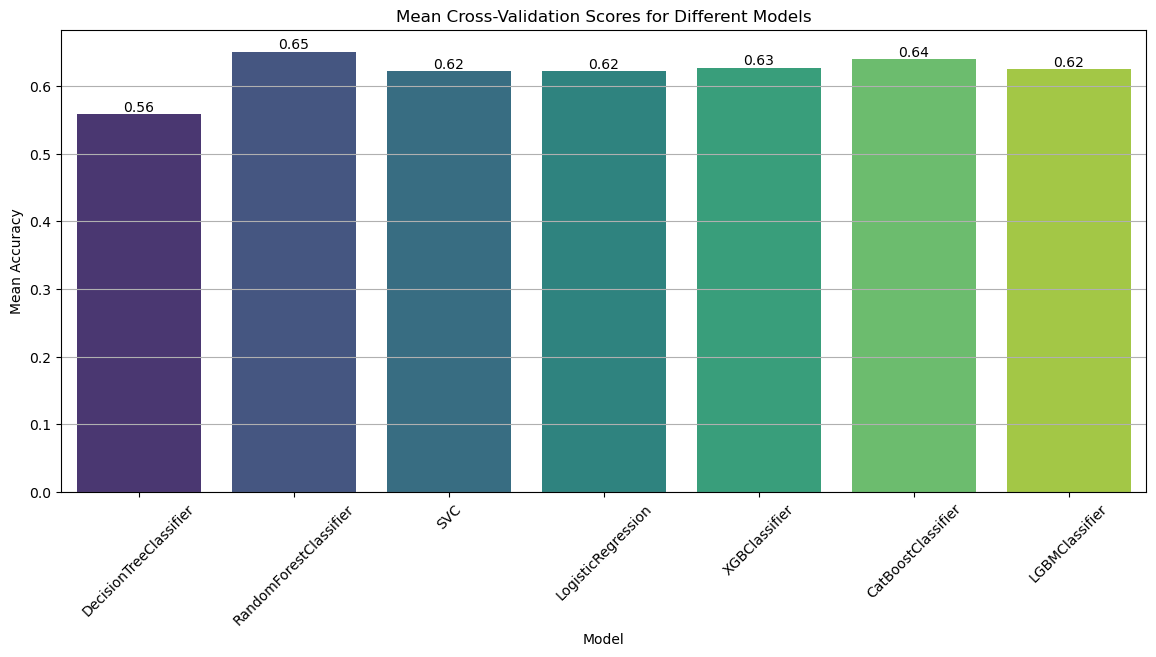

In [55]:

for entry in model_scores:
    model_name = entry['model'].__class__.__name__
    sns.lineplot(data=entry['scores'], label=f"{model_name} (mean: {entry['mean_score']:.2f})", marker='o')

plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


model_names = [entry['model'].__class__.__name__ for entry in model_scores]
mean_scores = [entry['mean_score'] for entry in model_scores]


plt.figure(figsize=(14, 6))
sns.barplot(x=model_names, y=mean_scores, palette="viridis")
plt.title('Mean Cross-Validation Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y')


for i, mean_score in enumerate(mean_scores):
    plt.text(i, mean_score, f"{mean_score:.2f}", ha='center', va='bottom')

# Show the bar plot
plt.show()


 > ### ***7.2 Fine Tuninng***

In [56]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'iterations': [100, 500, 1000],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'depth': [4, 6, 8]
# }

# # Initialize CatBoostClassifier
# model = CatBoostClassifier(random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# # Perform grid search
# grid_search.fit(X_train_pre, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)


----
# ***8. Model Evlauation On Test-Set***
---

In [57]:
def evaluate_model(y_test, y_pred):
    # Compute evaluation metrics
    acc = accuracy_score(y_test, y_pred)

    
    # Print evaluation metrics
    print('Accuracy score:', acc)

    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


In [73]:
best_params ={'depth': 5, 'iterations': 100, 'learning_rate': 0.12, 'random_state': 42}
catboost_v2 = CatBoostClassifier(**best_params )
catboost_v2.fit(X_train_pre, y_train)
y_pred_catboos_v2 = catboost_v2.predict(X_test_pre)

0:	learn: 1.4845543	total: 1.95ms	remaining: 193ms
1:	learn: 1.3771221	total: 4.01ms	remaining: 197ms
2:	learn: 1.3027909	total: 5.99ms	remaining: 194ms
3:	learn: 1.2398857	total: 7.79ms	remaining: 187ms
4:	learn: 1.1902545	total: 9.63ms	remaining: 183ms
5:	learn: 1.1464599	total: 11.4ms	remaining: 179ms
6:	learn: 1.1091530	total: 13.3ms	remaining: 176ms
7:	learn: 1.0718747	total: 15.3ms	remaining: 176ms
8:	learn: 1.0378495	total: 17.1ms	remaining: 173ms
9:	learn: 1.0153730	total: 19.3ms	remaining: 173ms
10:	learn: 0.9939576	total: 21.2ms	remaining: 172ms
11:	learn: 0.9731410	total: 23ms	remaining: 168ms
12:	learn: 0.9580849	total: 24.8ms	remaining: 166ms
13:	learn: 0.9429711	total: 26.8ms	remaining: 165ms
14:	learn: 0.9271343	total: 28.6ms	remaining: 162ms
15:	learn: 0.9146016	total: 30.4ms	remaining: 160ms
16:	learn: 0.8998409	total: 32.2ms	remaining: 157ms
17:	learn: 0.8879014	total: 34ms	remaining: 155ms
18:	learn: 0.8769483	total: 36ms	remaining: 154ms
19:	learn: 0.8653031	total: 

Accuracy score: 0.6467391304347826


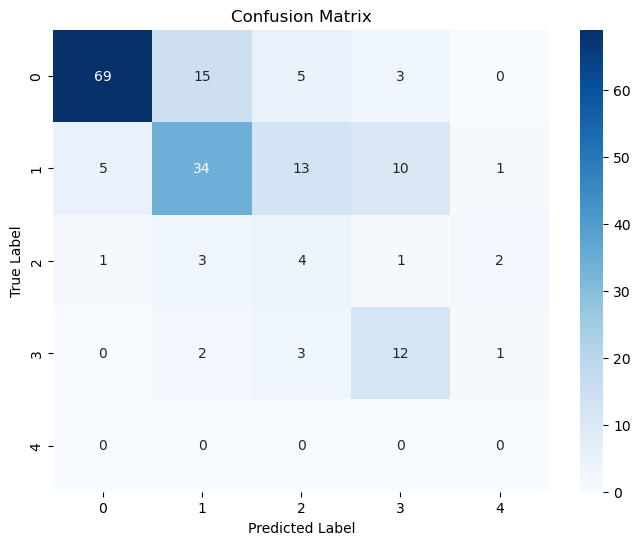

In [74]:
evaluate_model(y_pred_catboos_v2 , y_test)

In [76]:
print(classification_report(y_test , y_pred_catboos_v2))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        75
           1       0.54      0.63      0.58        54
           2       0.36      0.16      0.22        25
           3       0.67      0.46      0.55        26
           4       0.00      0.00      0.00         4

    accuracy                           0.65       184
   macro avg       0.46      0.43      0.44       184
weighted avg       0.61      0.65      0.61       184



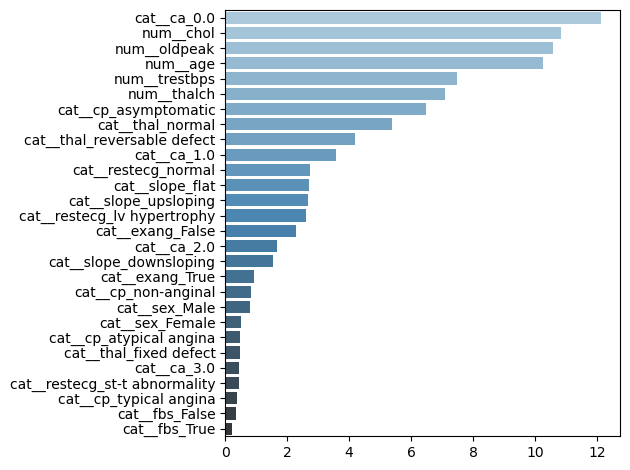

In [77]:
feature_importances = pd.Series(catboost_v2.feature_importances_, index=X_train_pre.columns).sort_values(ascending=False)

sns.barplot(y= feature_importances.index , x = feature_importances.values , palette="Blues_d")
plt.tight_layout()
plt.show()

----
# ***9. Build a Full Pipline to Deploy***
---

In [78]:
full_pipline = Pipeline([
    ('preprocessing' , preprocessor),
    ('cat', catboost_v2) 
])
full_pipline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['thal', 'ca', 'slope',
                                                   'exang', 'restecg', 'fbs',
                                                   'cp', 'sex']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['oldpeak', 'thalch', 'chol',
                                                   'trestbps', 'age'])])),
                ('cat',
                 <catboost.core.CatBoostClassifier object at 0x7532c51b06d0>)])

In [79]:
X_train_pre

,cat__thal_fixed defect,cat__thal_normal,cat__thal_reversable defect,cat__ca_0.0,cat__ca_1.0,cat__ca_2.0,cat__ca_3.0,cat__slope_downsloping,cat__slope_flat,cat__slope_upsloping,...,cat__cp_atypical angina,cat__cp_non-anginal,cat__cp_typical angina,cat__sex_Female,cat__sex_Male,num__oldpeak,num__thalch,num__chol,num__trestbps,num__age
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.636364,0.422535,0.281924,0.71650,0.693878
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.295455,0.436620,0.340464,0.75000,0.530612
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.643409,0.586408,0.562189,0.64235,0.469388
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.477273,0.690141,0.363184,0.60000,0.448980
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.318182,0.788732,0.538972,0.60000,0.489796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.295455,0.718310,0.293532,0.70000,0.632653
732,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.511364,0.549296,0.343284,0.70000,0.673469
733,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.522727,0.366197,0.514096,0.80000,0.959184
734,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.522727,0.577465,0.358209,0.70000,0.510204


In [80]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
880,62,Male,asymptomatic,143.30,170.0,False,st-t abnormality,120.00,True,3.000,downsloping,0.0,reversable defect
457,54,Male,non-anginal,150.00,205.3,False,normal,122.00,False,0.000,upsloping,0.0,reversable defect
797,51,Male,non-anginal,128.47,339.0,False,normal,143.27,True,3.062,flat,0.0,reversable defect
25,50,Female,non-anginal,120.00,219.0,False,normal,158.00,False,1.600,flat,0.0,normal
84,52,Male,atypical angina,120.00,325.0,False,normal,172.00,False,0.200,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,59,Male,asymptomatic,140.00,177.0,False,normal,162.00,True,0.000,upsloping,1.0,reversable defect
270,61,Male,asymptomatic,140.00,207.0,False,lv hypertrophy,138.00,True,1.900,upsloping,1.0,reversable defect
860,75,Male,asymptomatic,160.00,310.0,True,normal,112.00,True,2.000,downsloping,0.0,reversable defect
435,53,Female,atypical angina,140.00,216.0,False,normal,142.00,True,2.000,flat,0.0,normal


In [81]:
full_pipline.fit(X_train , y_train)

0:	learn: 1.4845543	total: 2.26ms	remaining: 224ms
1:	learn: 1.3771221	total: 4.52ms	remaining: 221ms
2:	learn: 1.3027909	total: 6.55ms	remaining: 212ms
3:	learn: 1.2398857	total: 8.8ms	remaining: 211ms
4:	learn: 1.1902545	total: 11.8ms	remaining: 224ms
5:	learn: 1.1464599	total: 14.2ms	remaining: 223ms
6:	learn: 1.1091530	total: 16.1ms	remaining: 214ms
7:	learn: 1.0718747	total: 17.8ms	remaining: 204ms
8:	learn: 1.0378495	total: 19.6ms	remaining: 198ms
9:	learn: 1.0153730	total: 21.5ms	remaining: 193ms
10:	learn: 0.9939576	total: 23.2ms	remaining: 188ms
11:	learn: 0.9731410	total: 25ms	remaining: 183ms
12:	learn: 0.9580849	total: 26.9ms	remaining: 180ms
13:	learn: 0.9429711	total: 28.7ms	remaining: 176ms
14:	learn: 0.9271343	total: 30.4ms	remaining: 172ms
15:	learn: 0.9146016	total: 32ms	remaining: 168ms
16:	learn: 0.8998409	total: 33.7ms	remaining: 164ms
17:	learn: 0.8879014	total: 35.5ms	remaining: 162ms
18:	learn: 0.8769483	total: 37.1ms	remaining: 158ms
19:	learn: 0.8653031	total:

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['thal', 'ca', 'slope',
                                                   'exang', 'restecg', 'fbs',
                                                   'cp', 'sex']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['oldpeak', 'thalch', 'chol',
                                                   'trestbps', 'age'])])),
                ('cat',
                 <catboost.core.CatBoostClassifier object at 0x7532c51b06d0>)])

In [82]:
y_predict = full_pipline.predict(X_test)

----
# ***10. Save a Pipline***
---

In [83]:
joblib.dump(full_pipline, 'heart_disease_pipline.pkl')

['heart_disease_pipline.pkl']

In [84]:
df = pd.read_csv('heart_disease_uci.csv')

In [85]:
model = joblib.load('heart_disease_pipline.pkl')

In [86]:
accuracy_score(model.predict(X_test) , y_test)

0.6467391304347826

---
# ***The End***
--- 
***Hopefully, this notebook will be useful for everyone. Upvote if you like the work. Also, comment your feedback below, which would help me improve.*** 